# Perform Clustering (Hierarchical, K Means & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
# Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,calinski_harabasz_score,silhouette_samples

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset

crime=pd.read_csv("crime_data (1).csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# Renaming the Unnamed: 0 Column into States

crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime.size

250

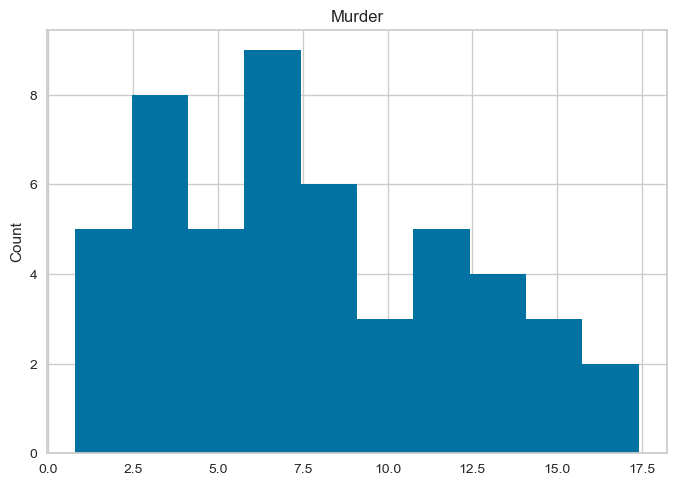

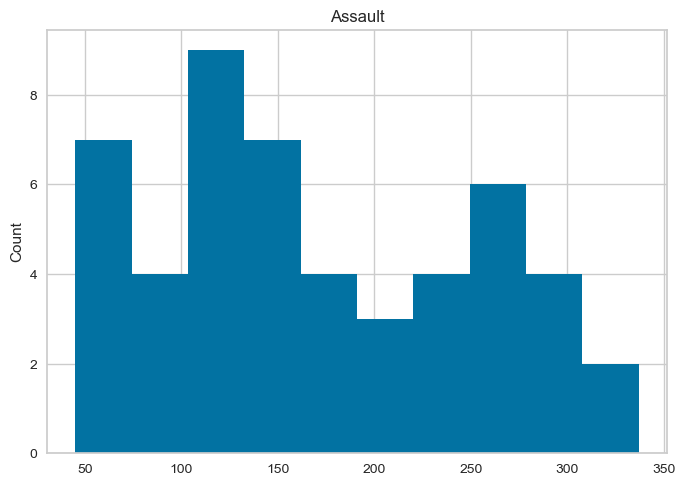

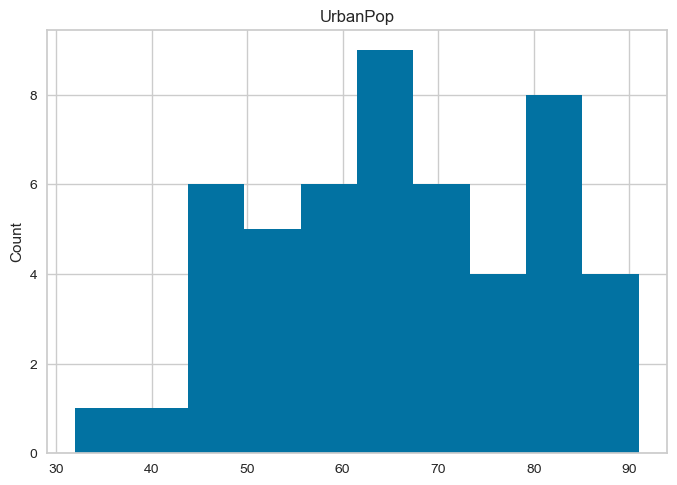

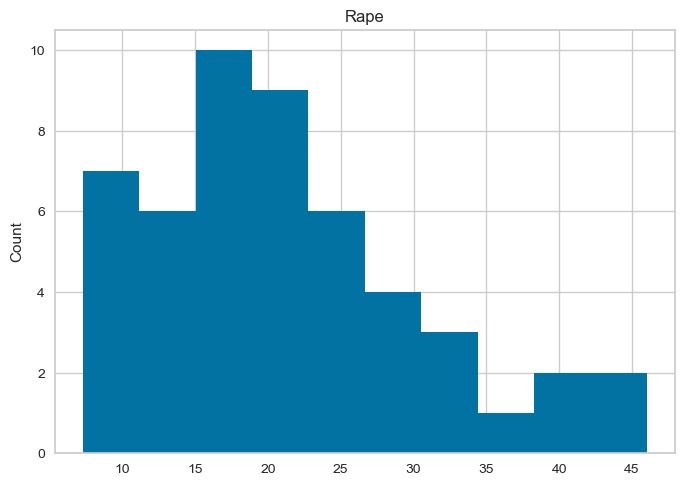

In [10]:
# Exploratory Data Analysis

# Analyze the features by creating histograms to understand the distribution

continious_feature=[feature for feature in crime.columns if crime[feature].dtype!="O"]
for feature in continious_feature:
    crime1=crime.copy()
    crime[feature].hist(bins=10)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Murder


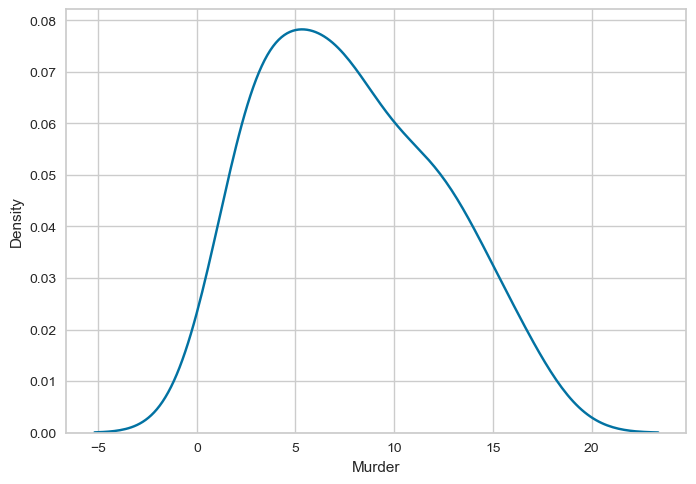

Assault


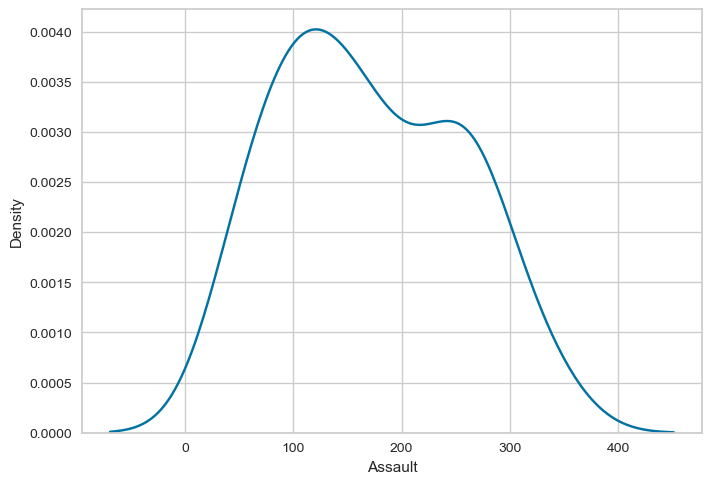

UrbanPop


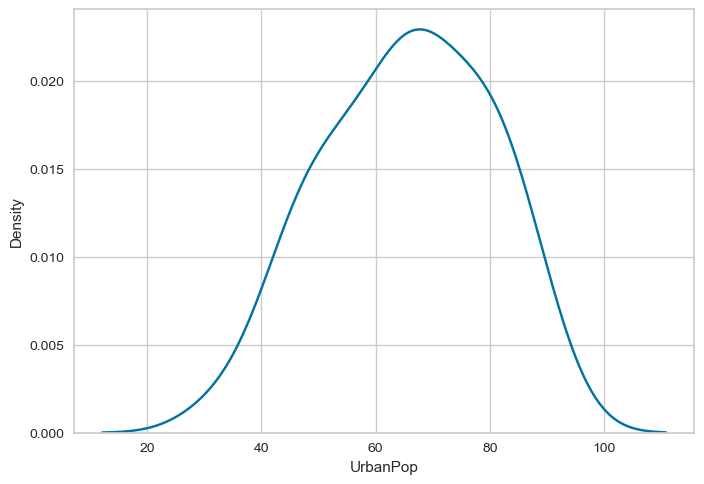

Rape


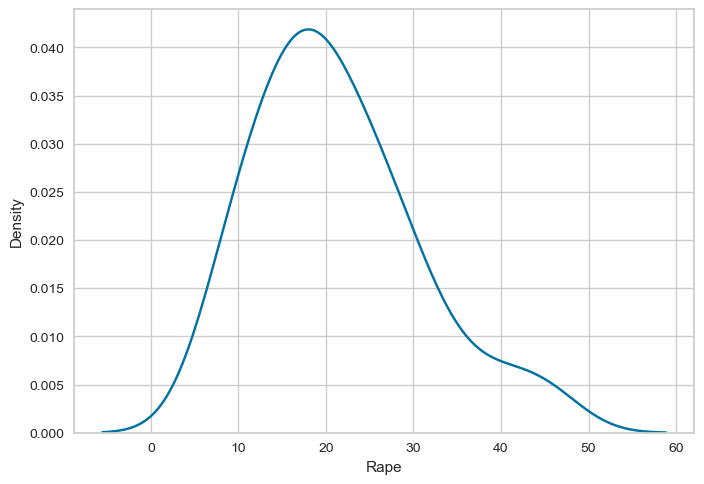

In [11]:
# Kernel Density for every feature, singled out

for n in continious_feature:
    print(n)
    sns.kdeplot(crime[n])
    plt.show()

In [12]:
# Outliers Detection

crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

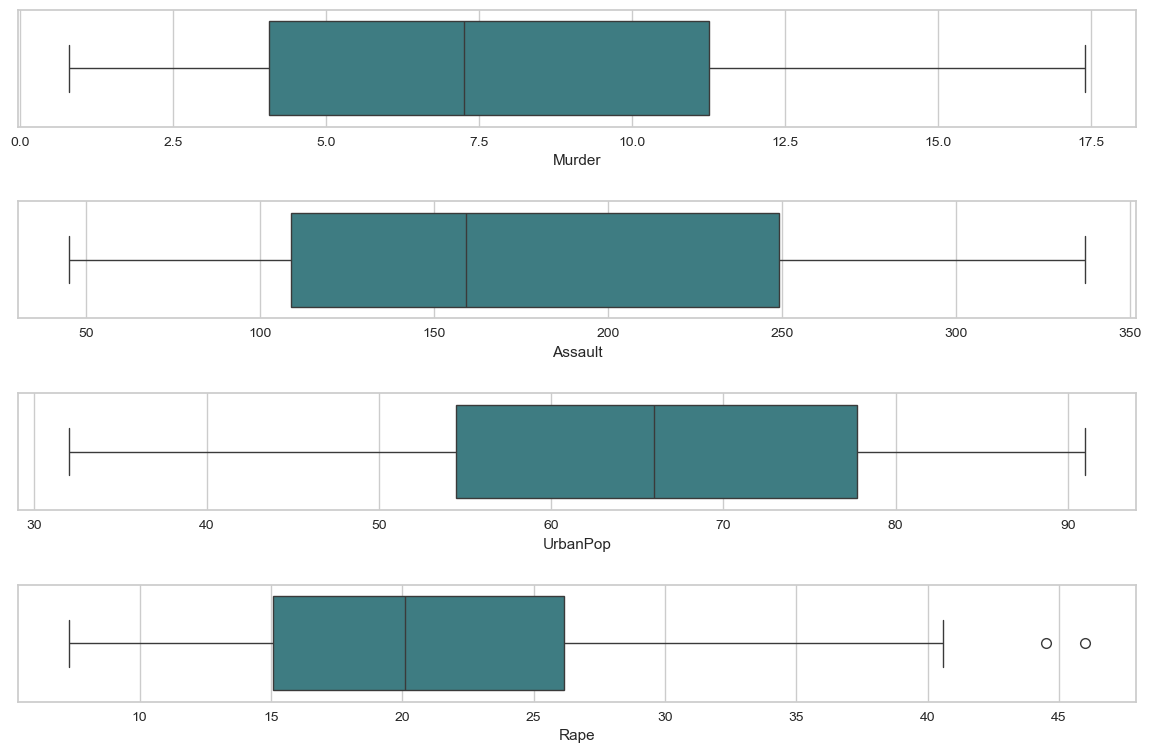

In [13]:
outlier=crime.copy()
fig,axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x="Murder",data=outlier,palette="crest",ax=axes[0])
sns.boxplot(x="Assault",data=outlier,palette="crest",ax=axes[1])
sns.boxplot(x="UrbanPop",data=outlier,palette="crest",ax=axes[2])
sns.boxplot(x="Rape",data=outlier,palette="crest",ax=axes[3])
plt.tight_layout(pad=2.0)


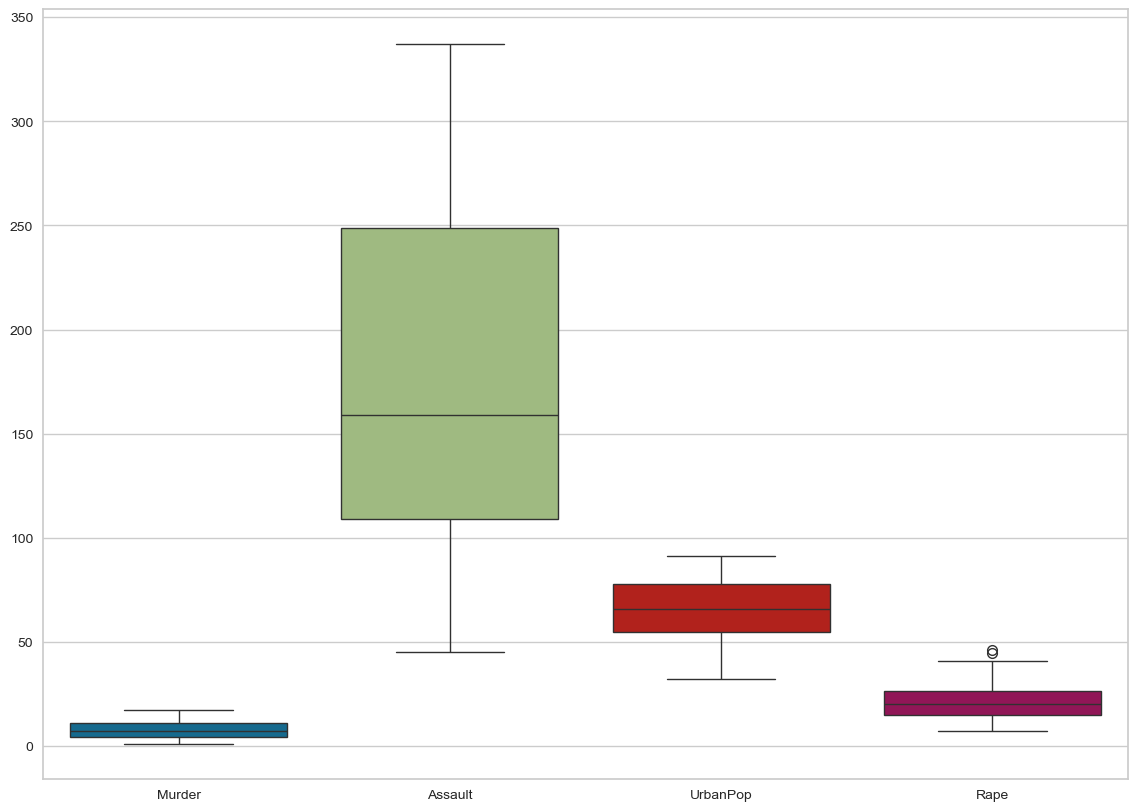

In [14]:
# Box plot for every feature in the same graph

plt.figure(figsize=(14,10))
sns.boxplot(data=crime)
plt.show()

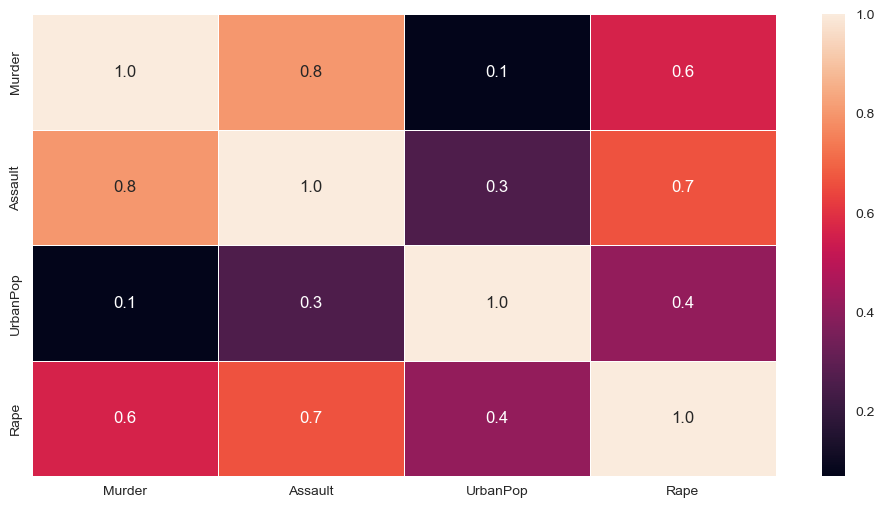

In [15]:
# Correlation Heatmap

numeric_columns = crime.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()


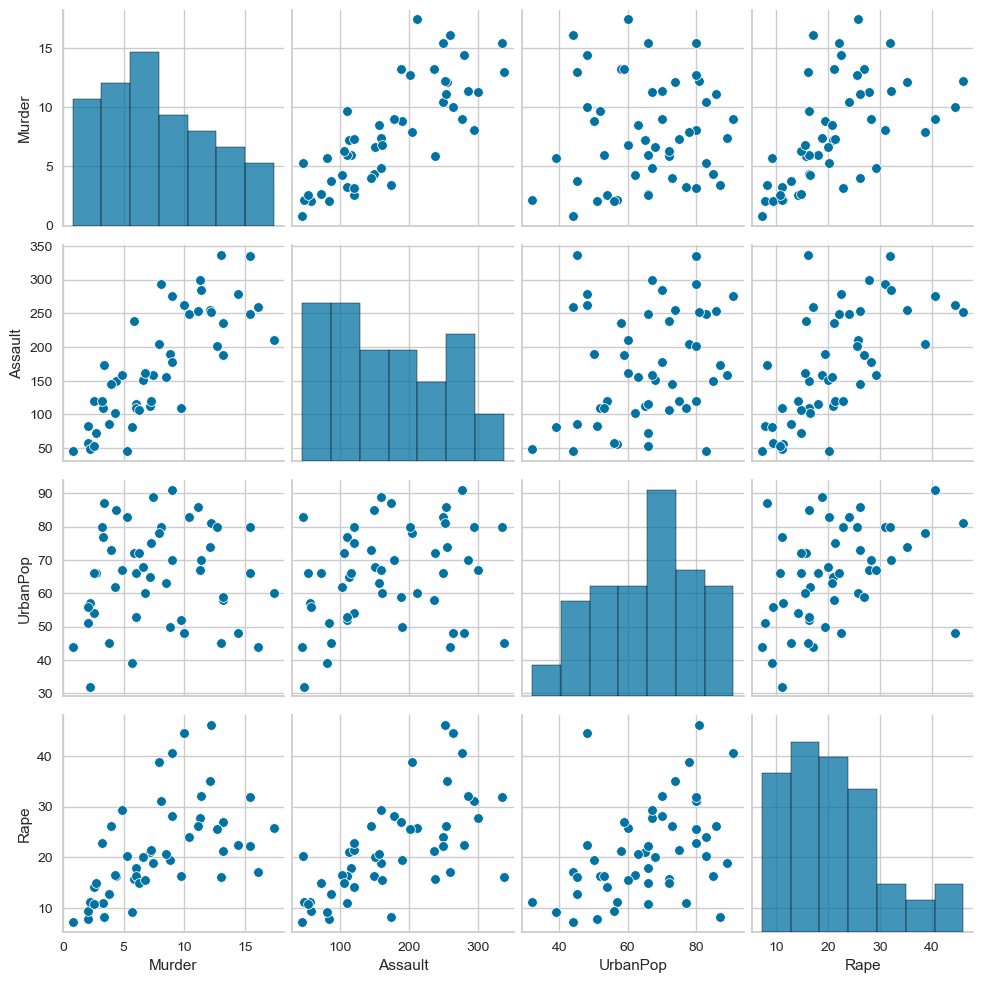

In [16]:
# Pairplot

sns.pairplot(crime)
plt.show()

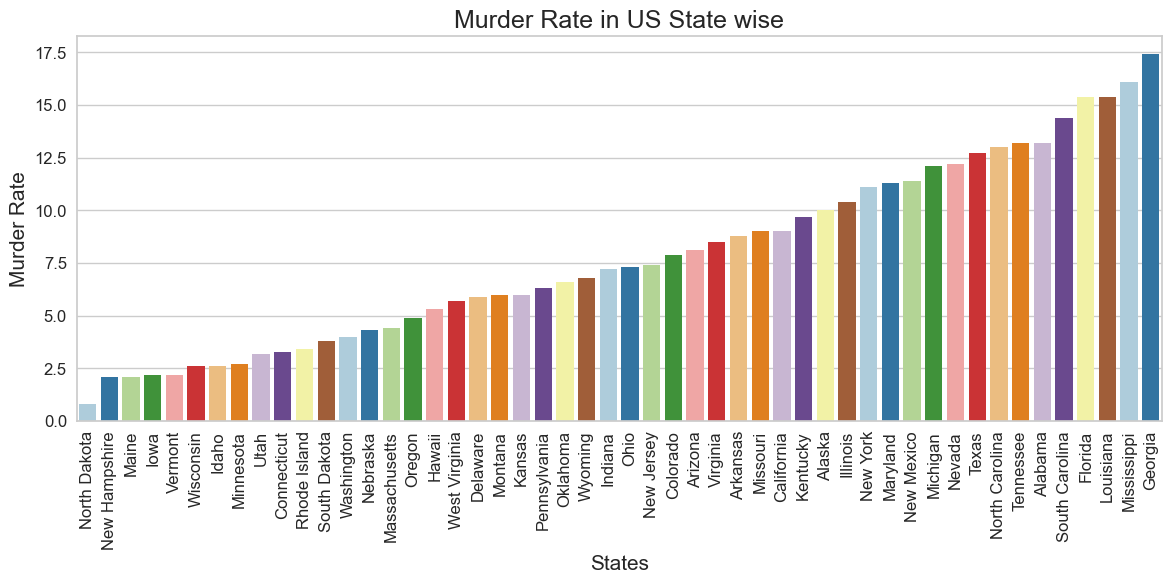

In [17]:
# Murder Rate

plt.figure(figsize=(14,5))

sns.barplot(x="States",y="Murder",palette="Paired",data=crime,order=crime.sort_values("Murder").States)


# Set labels

plt.xlabel("States",size=15)
plt.ylabel("Murder Rate",size=15)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

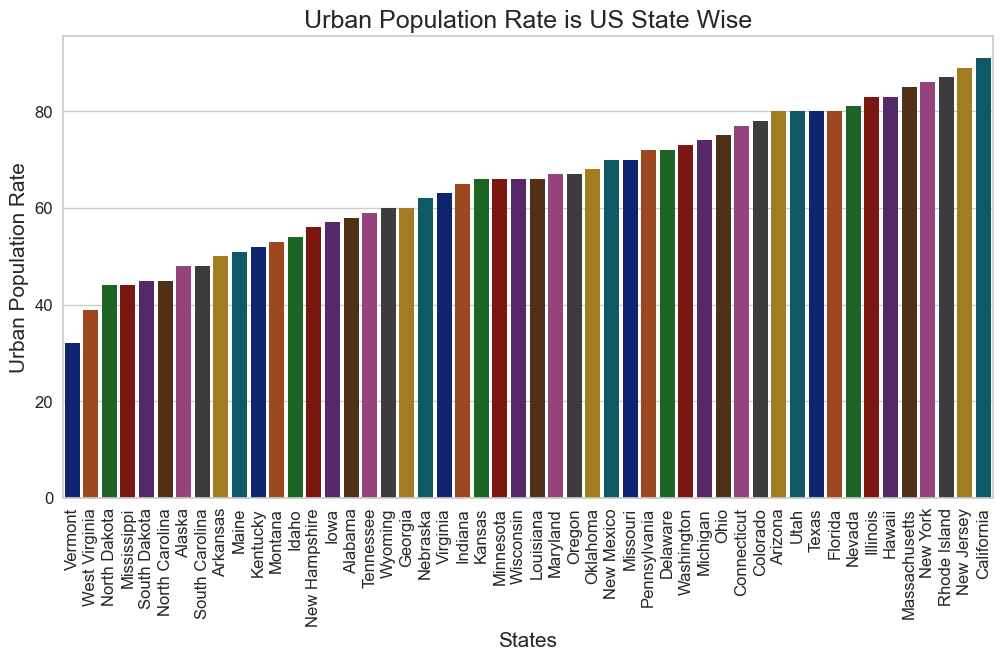

In [18]:
plt.figure(figsize=(12,6))

# Make barplot and sorting the bars

sns.barplot(x="States",y="UrbanPop",palette="dark",data=crime,order=crime.sort_values("UrbanPop").States)

# Set Labels

plt.xlabel("States",size=15)
plt.ylabel("Urban Population Rate",size=15)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Urban Population Rate is US State Wise",size=18)
plt.show()

#  -> There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect


In [19]:
high_murder=crime.sort_values("Murder",ascending=False,ignore_index=True)
high_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5
5,Alabama,13.2,236,58,21.2
6,Tennessee,13.2,188,59,26.9
7,North Carolina,13.0,337,45,16.1
8,Texas,12.7,201,80,25.5
9,Nevada,12.2,252,81,46.0


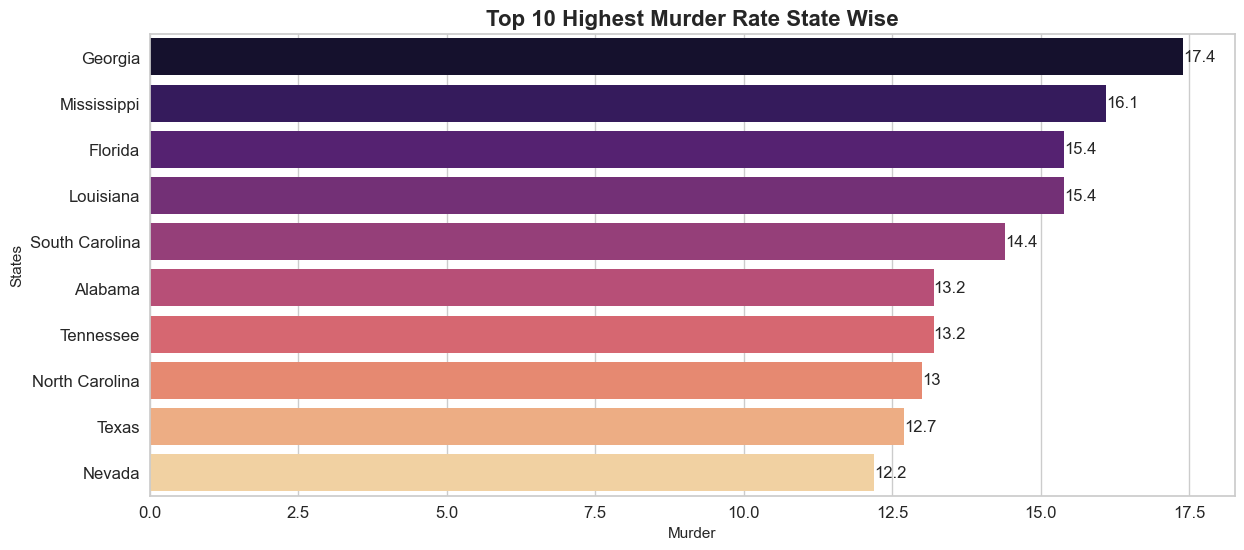

In [20]:
    
plt.figure(figsize=(14,6))
ax=sns.barplot(x=high_murder.Murder[:10],y=high_murder.States[:10],palette="magma")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=0,fontsize=12)
plt.title("Top 10 Highest Murder Rate State Wise",  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

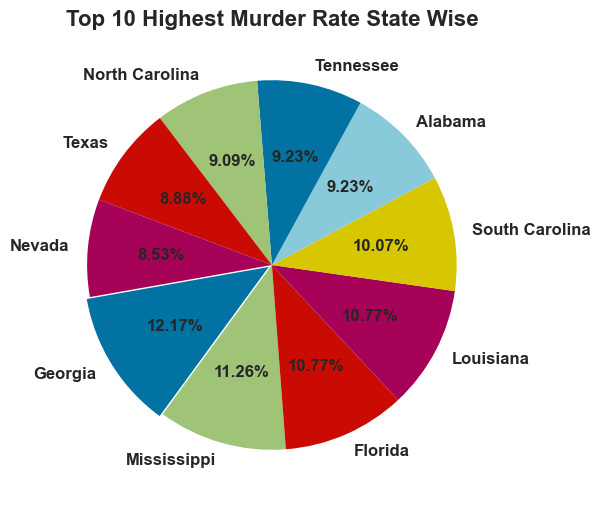

In [21]:
# Pie Chart

plt.figure(figsize=(6,6))
plt.pie(high_murder.Murder[:10],labels=high_murder.States[:10],
       explode=[0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct="%.2f%%",startangle=190,textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [22]:
low_murder=crime.sort_values("Murder",ascending=True,ignore_index=True)
low_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2
5,Wisconsin,2.6,53,66,10.8
6,Idaho,2.6,120,54,14.2
7,Minnesota,2.7,72,66,14.9
8,Utah,3.2,120,80,22.9
9,Connecticut,3.3,110,77,11.1


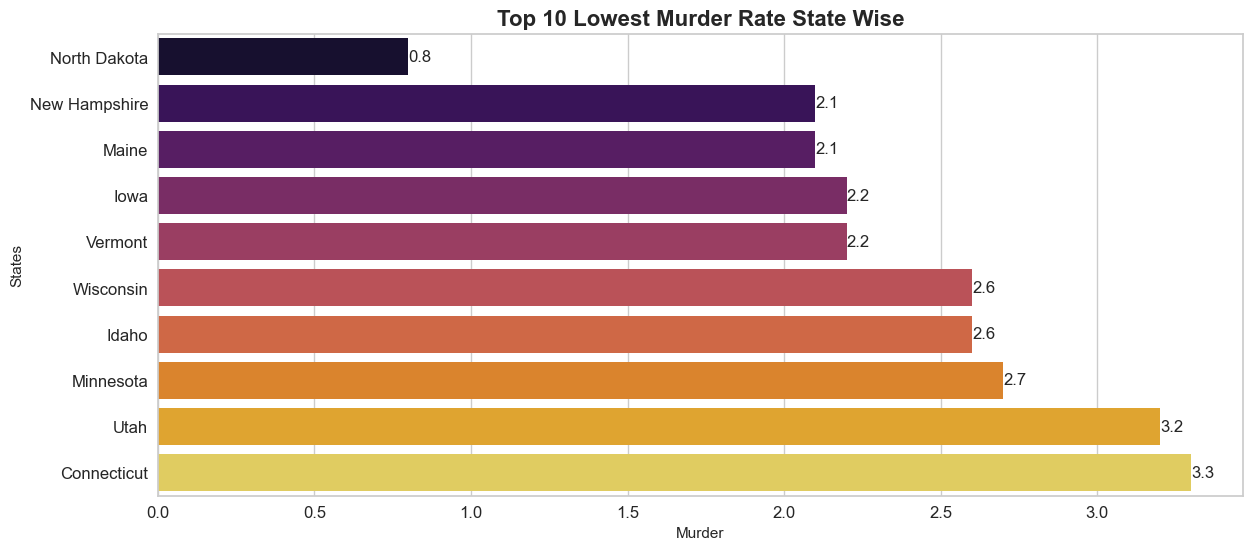

In [23]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x=low_murder.Murder[:10],y=low_murder.States[:10],palette="inferno")
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=0,fontsize=12)
plt.title("Top 10 Lowest Murder Rate State Wise",fontsize=16,fontweight="bold")
for i in ax.containers:
    ax.bar_label(i)

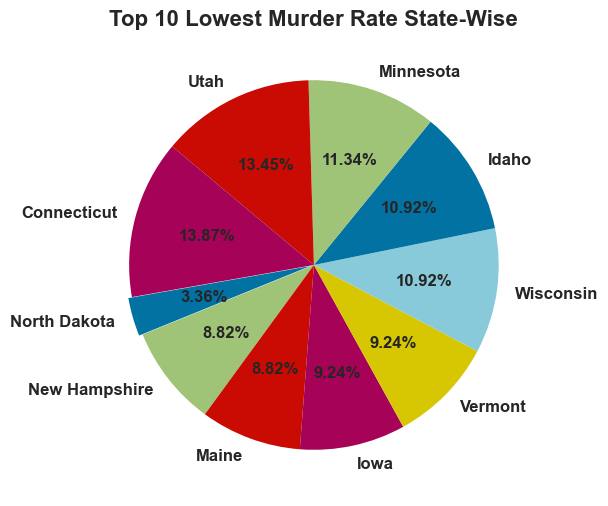

In [24]:
plt.figure(figsize=(6,6))
plt.pie(low_murder.Murder[:10],labels=low_murder.States[:10],
       explode=[0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct="%.2f%%",startangle=190,textprops={'size':'medium', 'fontweight':'bold'})
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

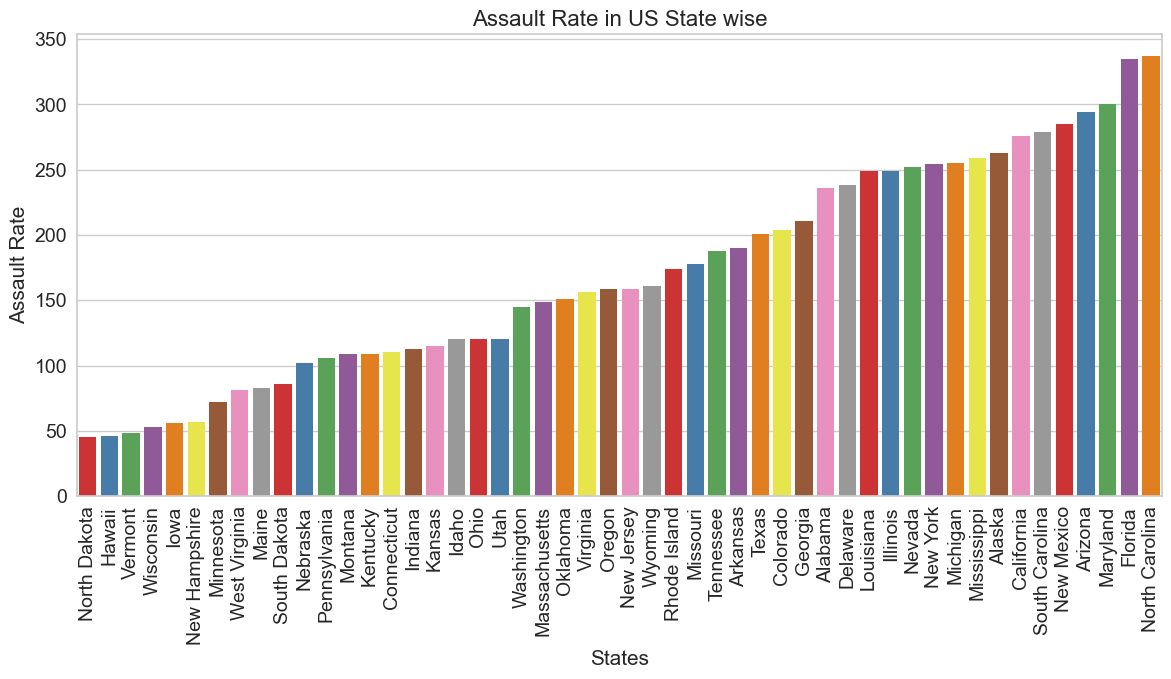

In [25]:
# Assault Rate

plt.figure(figsize=(14,6))

# Making the barplots and sorting the bars

sns.barplot(x="States",y="Assault",palette="Set1",data=crime,order=crime.sort_values("Assault").States)

# Set Labels

plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=16)
plt.show()


In [26]:
high_assault=crime.sort_values("Assault",ascending=False,ignore_index=True)
high_assault.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


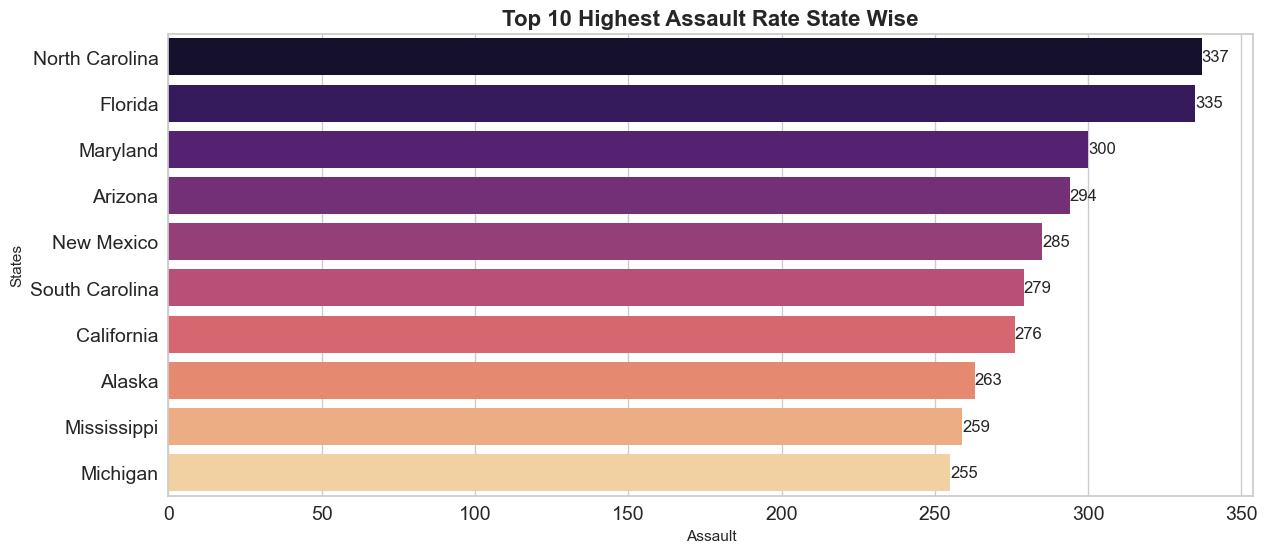

In [27]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_assault.Assault[:10], y = high_assault.States[:10],palette="magma")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

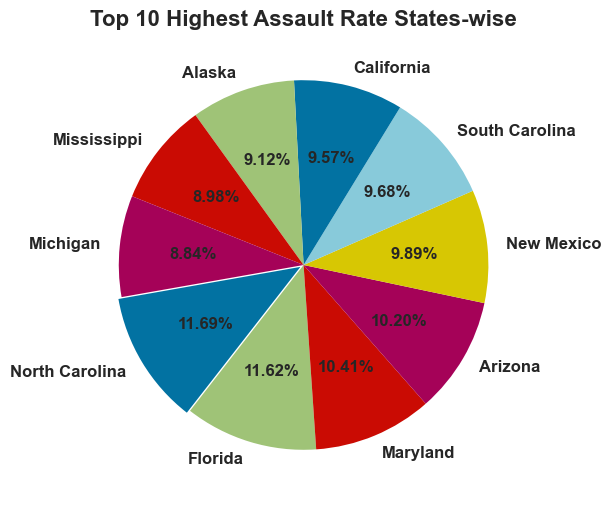

In [28]:
plt.figure(figsize = (6,6))
plt.pie(high_assault.Assault[:10], labels=high_assault.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [29]:
low_assault=crime.sort_values("Assault",ascending=True,ignore_index=True)
low_assault.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


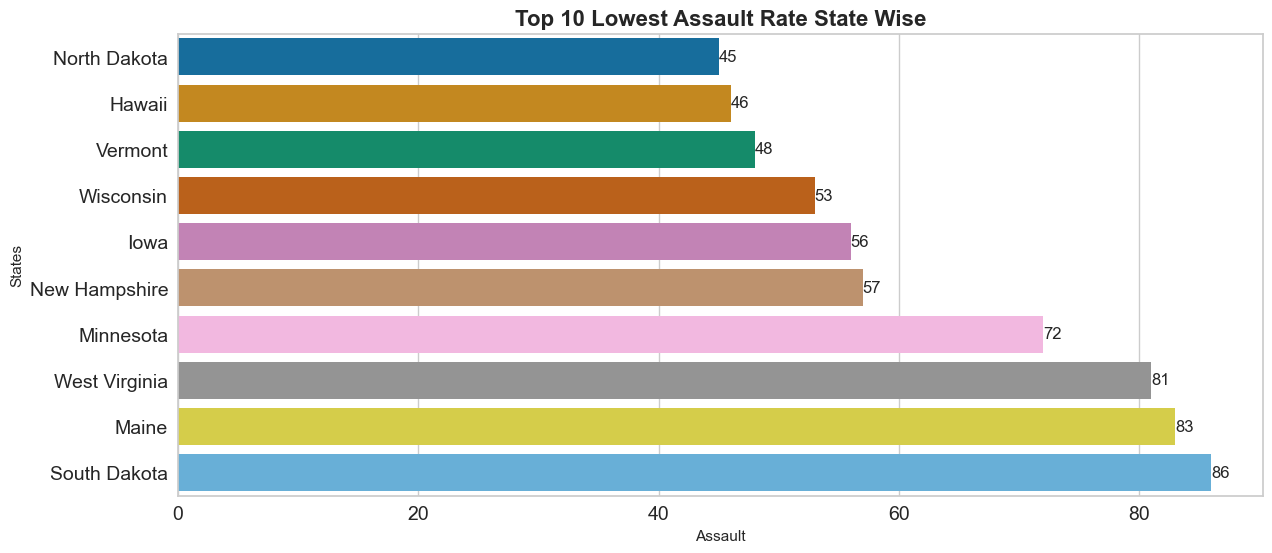

In [30]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_assault.Assault[:10], y = low_assault.States[:10],palette="colorblind")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

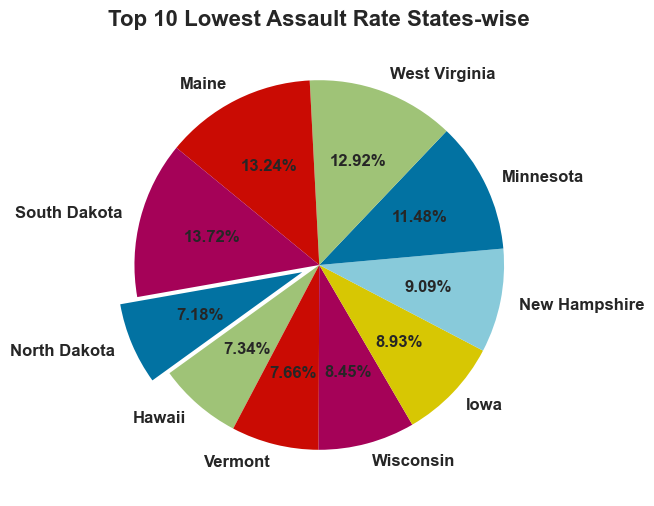

In [31]:
plt.figure(figsize = (6,6))
plt.pie(low_assault.Assault[:10], labels= low_assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

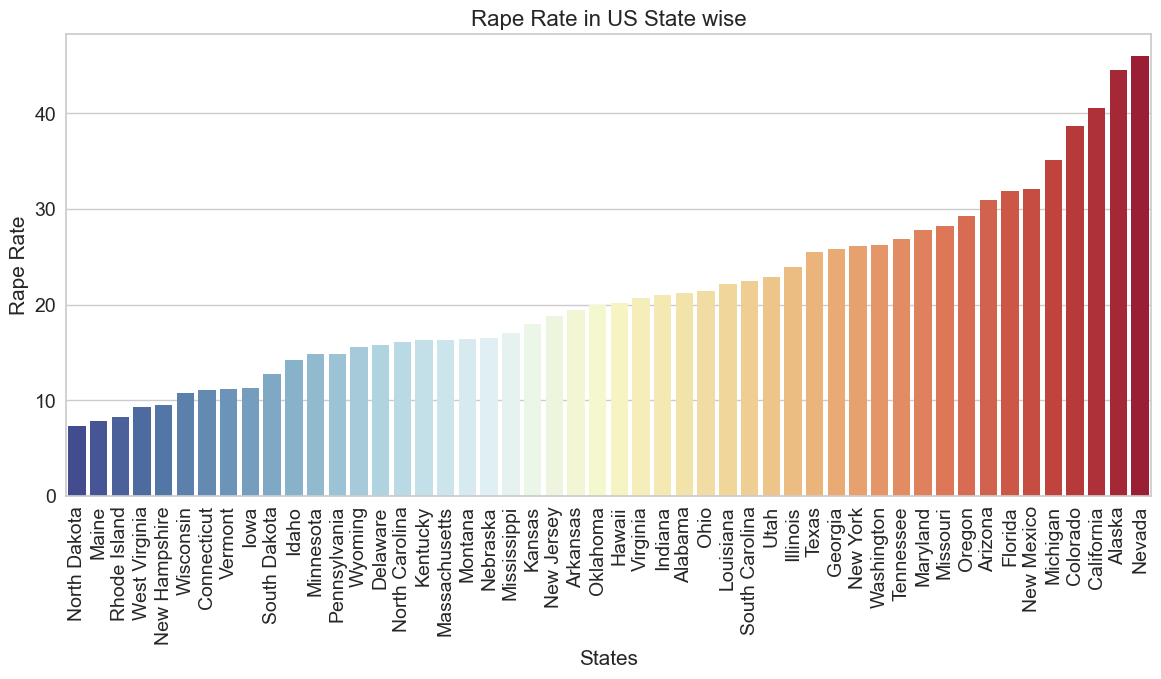

In [32]:
#  Rape Rate

plt.figure(figsize=(14,6))

# make barplot and sort bars

sns.barplot(x='States', y="Rape",palette="RdYlBu_r",data=crime, order=crime.sort_values('Rape').States)

# set labels

plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [33]:
high_rape = crime.sort_values('Rape', ascending=False, ignore_index=True)
high_rape.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [34]:
low_rape = crime.sort_values('Rape', ascending=True, ignore_index=True)
low_rape.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


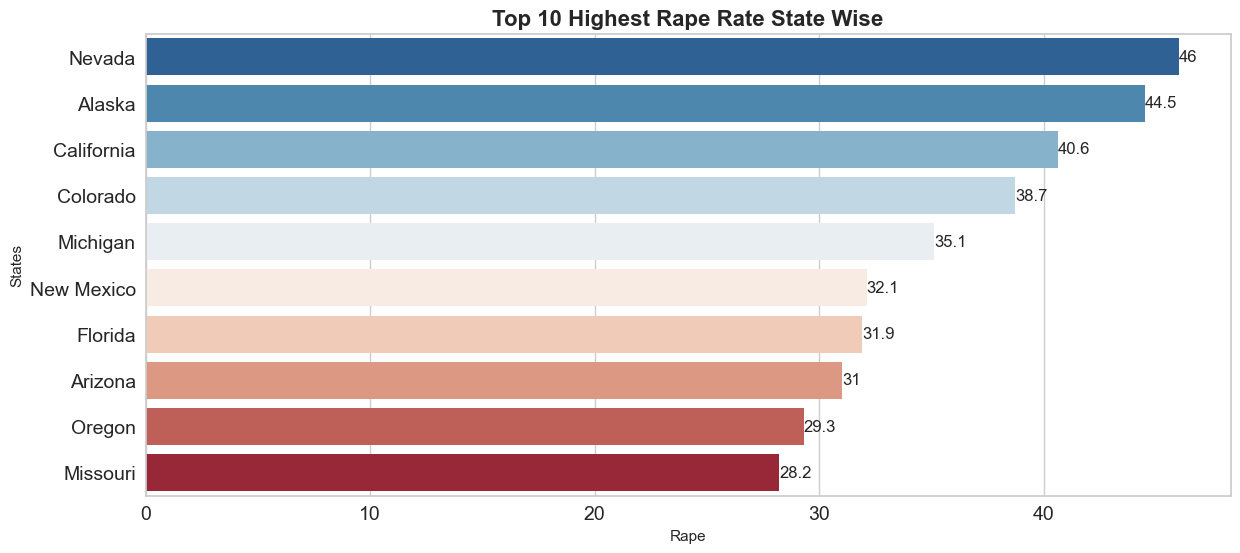

In [35]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape.Rape[:10], y =high_rape.States[:10],palette="RdBu_r")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

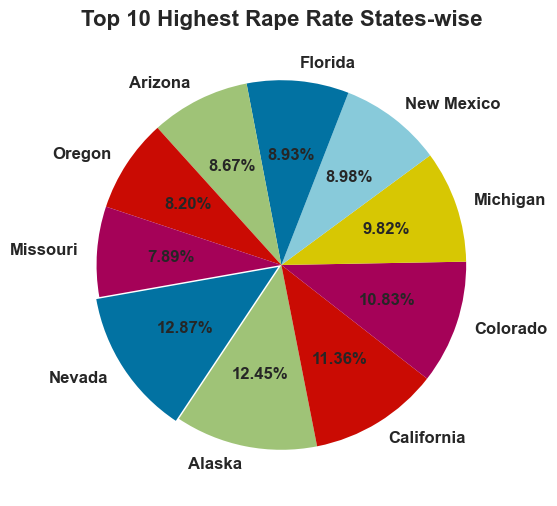

In [36]:
plt.figure(figsize = (6,6))
plt.pie(high_rape.Rape[:10], labels= high_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

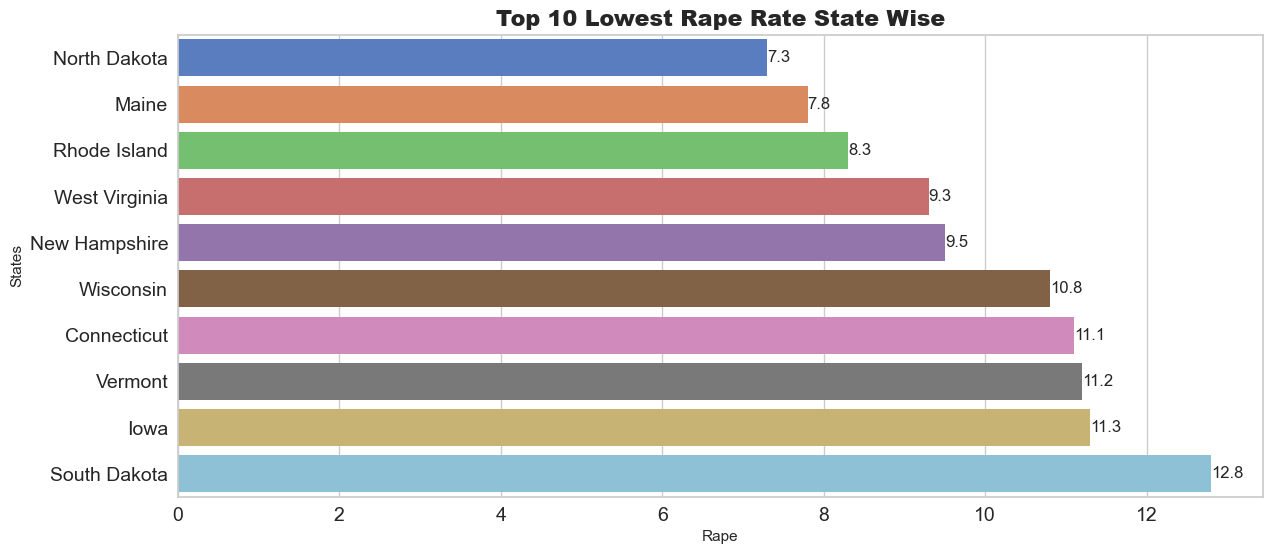

In [37]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_rape.Rape[:10], y = low_rape.States[:10],palette="muted")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = "heavy")
for i in ax.containers:
    ax.bar_label(i)

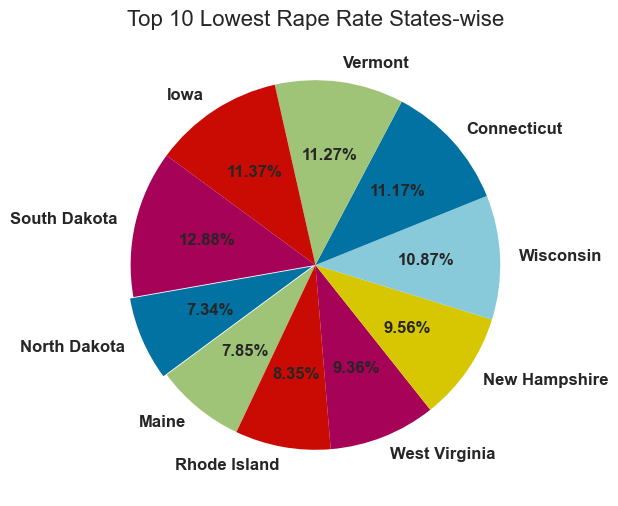

In [38]:
plt.figure(figsize = (6,6))
plt.pie(low_rape.Rape[:10], labels= low_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'ultralight')
plt.show()

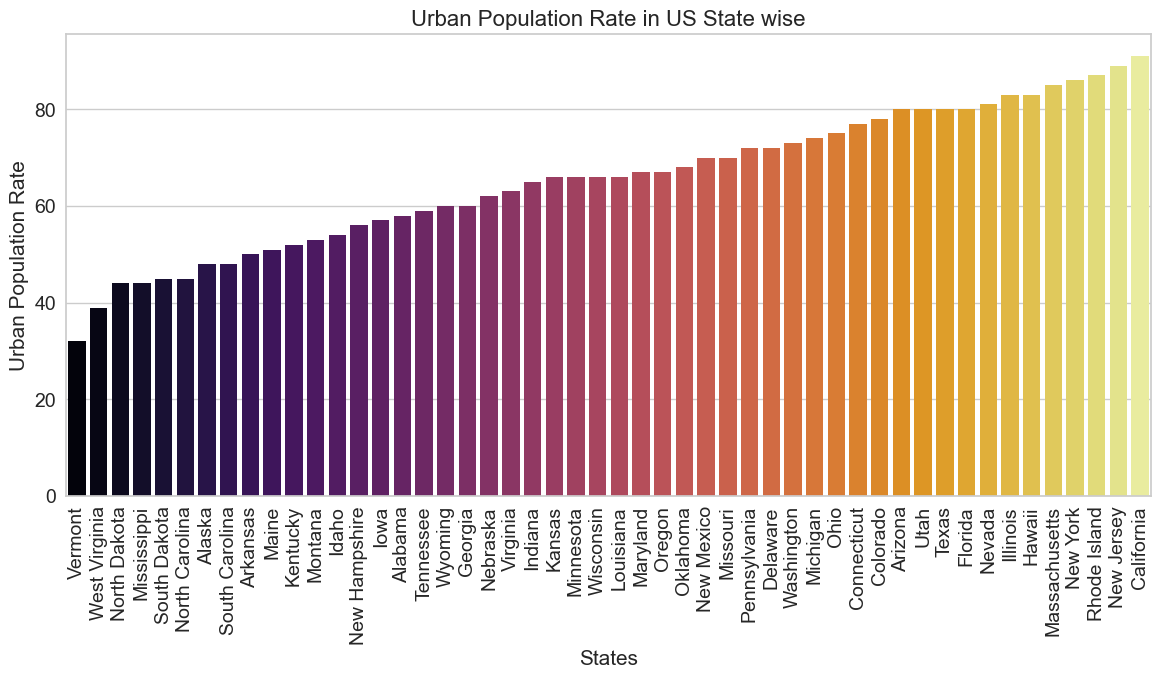

In [39]:
# Urban Population Rate

plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop",palette="inferno",data=crime, order=crime.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()

In [40]:
high_population = crime.sort_values('UrbanPop',ascending=False, ignore_index=True)
high_population.head(10)


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [41]:
low_population = crime.sort_values('UrbanPop',ascending=True, ignore_index=True)
low_population.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


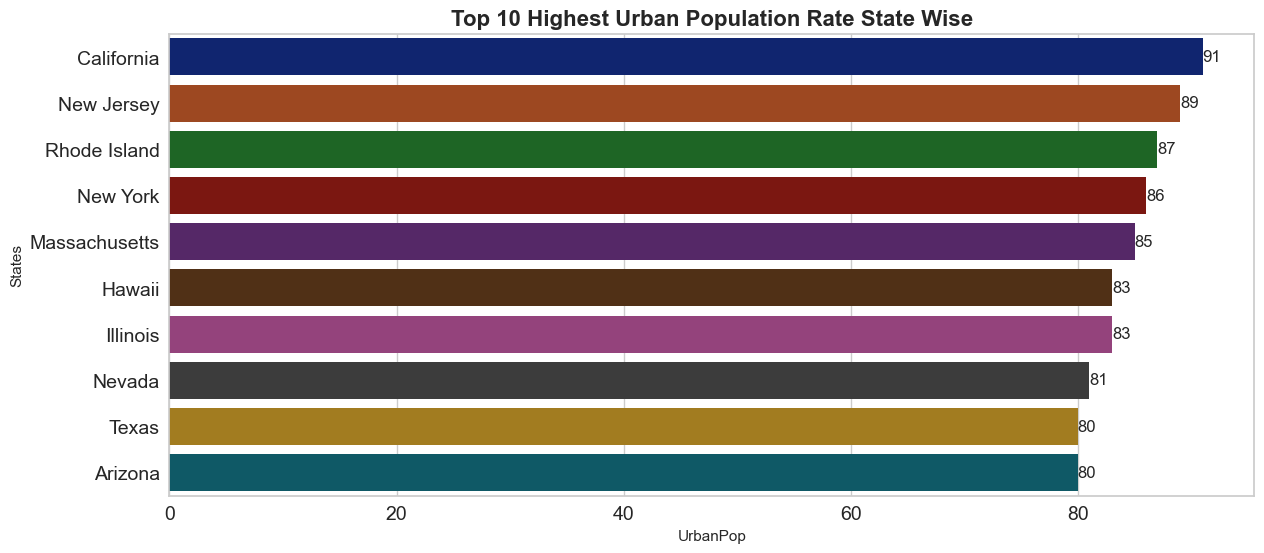

In [42]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_population.UrbanPop[:10], y = high_population.States[:10],palette="dark")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

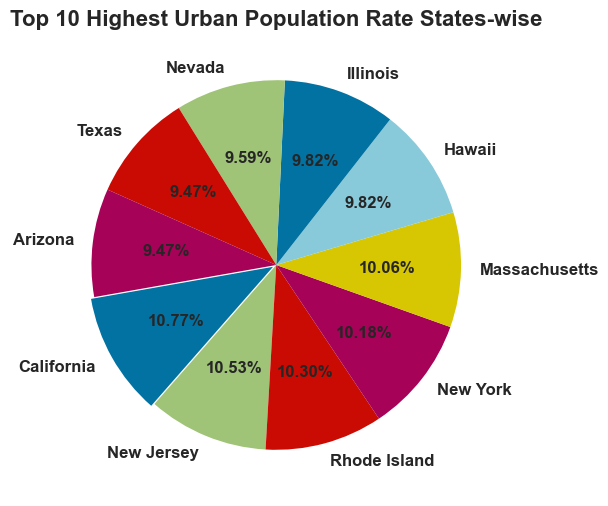

In [43]:
plt.figure(figsize = (6,6))
plt.pie(high_population.UrbanPop[:10], labels= high_population.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

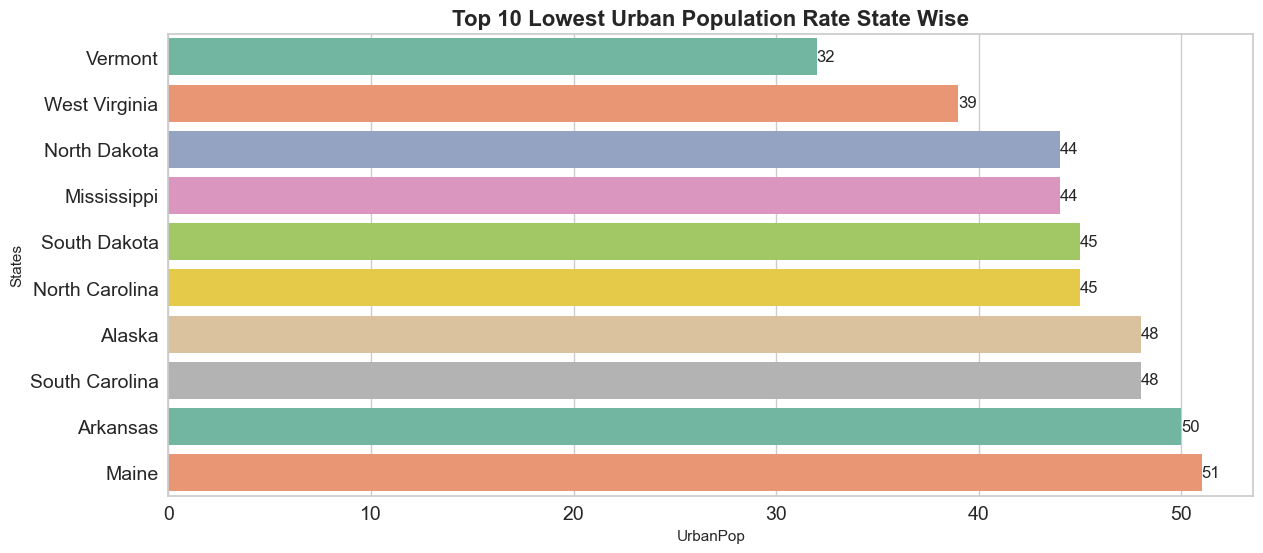

In [44]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_population.UrbanPop[:10], y = low_population.States[:10],palette="Set2")
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)
    
    

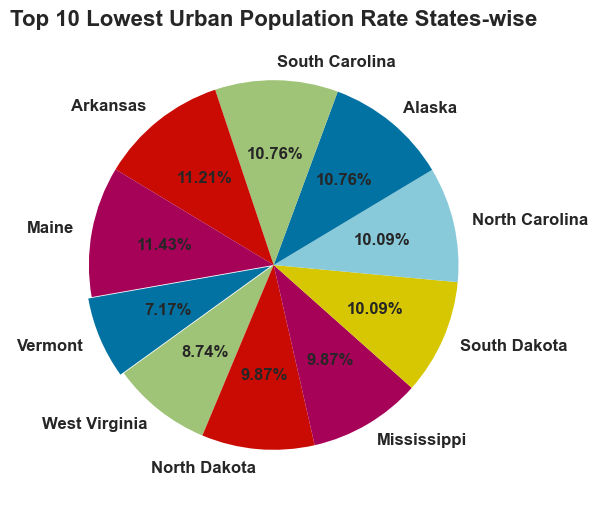

In [45]:
plt.figure(figsize = (6,6))
plt.pie(low_population.UrbanPop[:10], labels= low_population.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

# Highest Urban Population Rate : California, New Jersey and Rhode Island
# Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.

In [46]:
# Data Preprocessing

crime_df=crime.set_index("States")
crime_df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [47]:
# Standardizing the Data

standard_scaler=StandardScaler()
std_crime=standard_scaler.fit_transform(crime_df)
std_crime.shape

(50, 4)

In [48]:
# Normalizing the data

minmax=MinMaxScaler()
norm_crime=minmax.fit_transform(crime_df)
norm_crime.shape

(50, 4)

In [49]:
# KMeans Clustering

# Elbow Method for Determining Cluster Amount

# Standard Scaler Applied on Data

cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(std_crime)
    labels=clusters.labels_
    centriods=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df


,Num_Clusters,Cluster_Errors
0,1,200.000000
1,2,104.961633
2,3,79.921703
3,4,57.554259
4,5,49.969203
5,6,45.576764
6,7,40.157743
7,8,36.383124
8,9,30.758279
9,10,29.297016


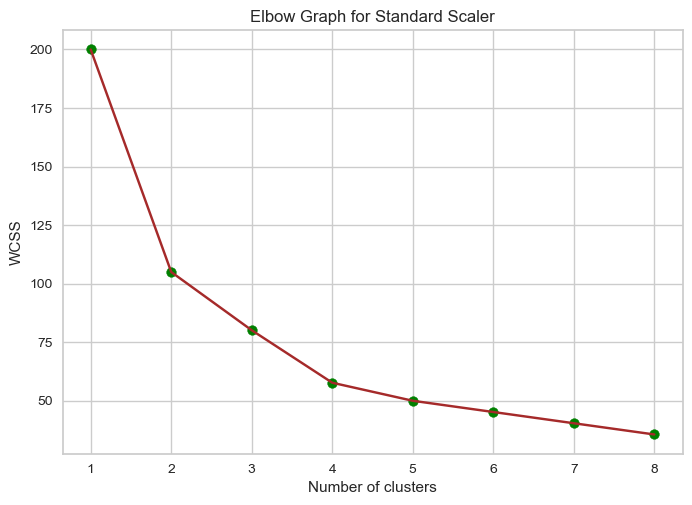

In [50]:
# Within-Cluster Sum-of-Squares Criterion

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,9),wcss,color = 'brown')
plt.scatter(range(1,9),wcss,color='green')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

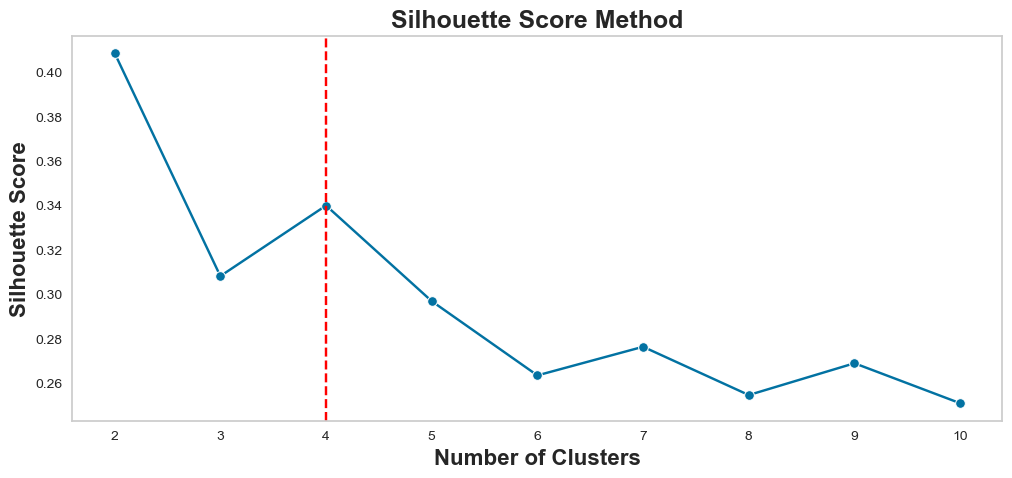

In [51]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_crime)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_crime, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
    
# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler Data :


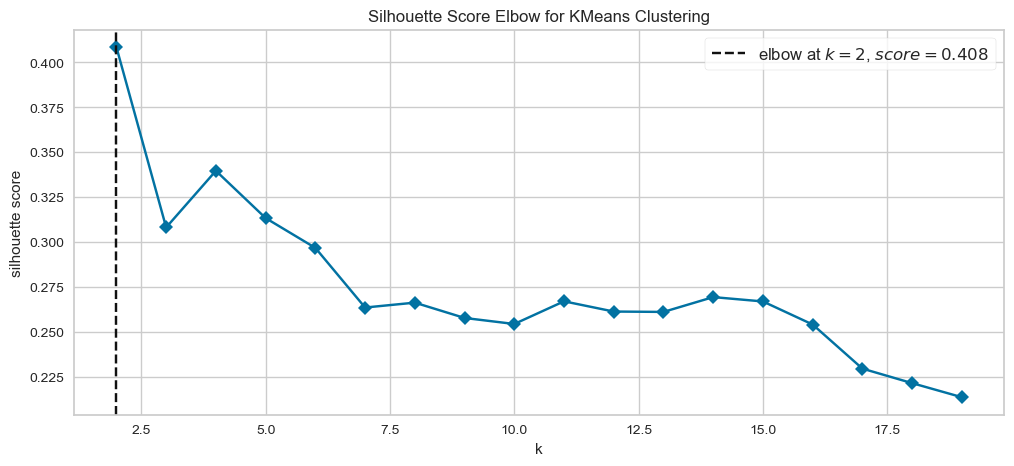

In [52]:
# Knee Elbow graph method

# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model=KMeans(random_state=10,max_iter=500,init="k-means++")

# # Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer= KElbowVisualizer(model,k=(2,20),metric="silhouette",timings=False)

# Fit the data and visualize

fig,ax=plt.subplots(figsize=(12,5))
print("Elbow Plot for Standard Scaler Data :")
visualizer.fit(std_crime)
visualizer.poof()
plt.show()

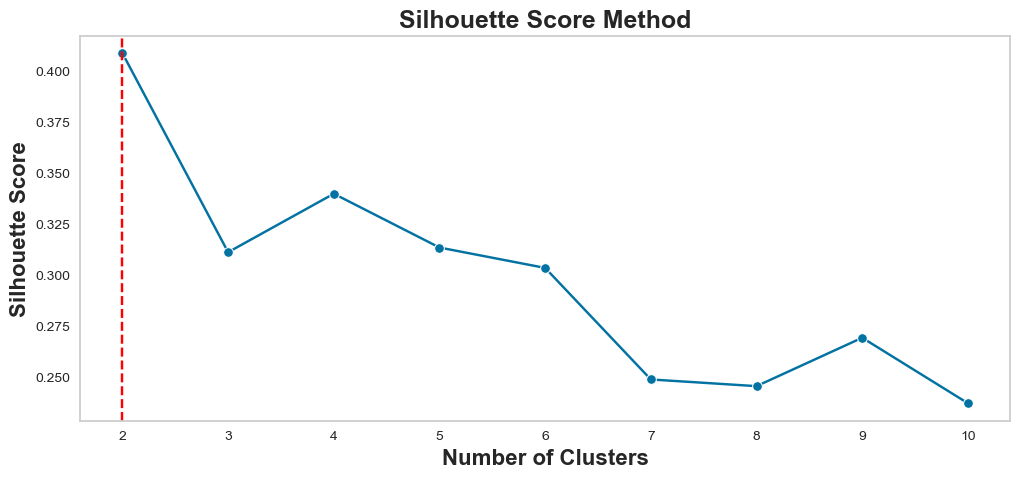

In [53]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_crime)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_crime, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
    
# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [54]:
clust_list=[2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(std_crime)
    sil_score1=silhouette_score(std_crime,cluster_labels1)
    print("For n_clusters=",n_clusters,"The average silhouette_score is:", sil_score1)

For n_clusters= 2 The average silhouette_score is: 0.4084890326217641
For n_clusters= 3 The average silhouette_score is: 0.3095091512791688
For n_clusters= 4 The average silhouette_score is: 0.33968891433344395
For n_clusters= 5 The average silhouette_score is: 0.30612803169146263
For n_clusters= 6 The average silhouette_score is: 0.29910456843899946
For n_clusters= 7 The average silhouette_score is: 0.23035904501364116
For n_clusters= 8 The average silhouette_score is: 0.2732934287338535
For n_clusters= 9 The average silhouette_score is: 0.2518939934580804


In [55]:
# Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset

# We have found good number of cluster = 3

# Model building using cluster numbers = 3

model_kmeans=KMeans(n_clusters=3,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(std_crime)
y_predict_kmeans.shape

(50,)

In [56]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [57]:
model_kmeans.labels_


array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [58]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [59]:
model_kmeans.inertia_


80.0888613219962

In [60]:
#Assign clusters to the data set

crime_df['Kmeans_Label'] = model_kmeans.labels_

In [61]:
# Group data by Clusters (K=6)

crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [62]:
crime_df[crime_df['Kmeans_Label']==0]


,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [63]:
crime_df[crime_df['Kmeans_Label']==1]


,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [64]:
crime_df[crime_df['Kmeans_Label']==2]


,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


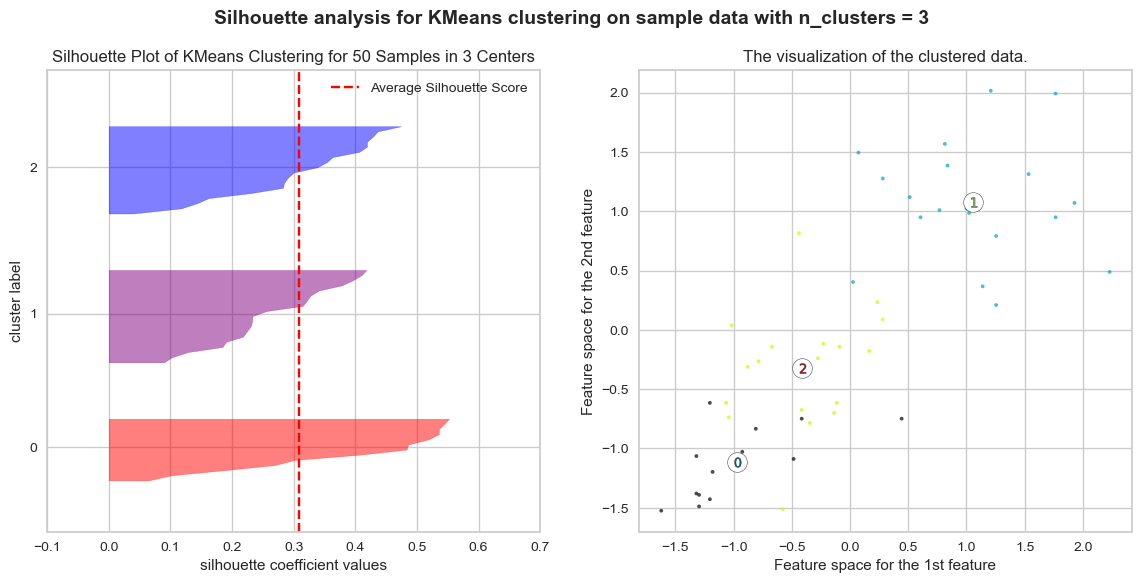

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1=SilhouetteVisualizer(model_kmeans,ax=ax1,colors=["red","purple","blue","yellow"])
sil_visualizer1.fit(std_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_kmeans.labels_.astype(float)/3)
ax2.scatter(std_crime[:,0],std_crime[:,1],marker=".",s=30,lw=0,alpha=0.7,c=colors1,edgecolor="k")

# Labeling the clusters
centers1=model_kmeans.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i,c in enumerate(centers1):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


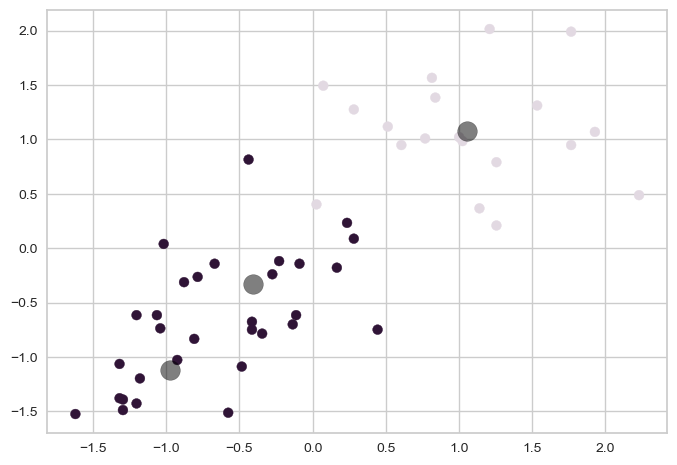

In [66]:
# Visualize the data we reduced to 2 sets.

plt.scatter(std_crime[:,0],std_crime[:,1],c=model_kmeans.labels_,s=50,cmap="twilight_shifted")
centers=model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5)
plt.show()

In [67]:
# Elbow Method and Silhouette Score on MinMaxScaler Applied Data

cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(norm_crime)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.018500
3,4,3.683456
4,5,3.184262
5,6,2.825169
6,7,2.540753
7,8,2.374747
8,9,2.038396
9,10,1.923702


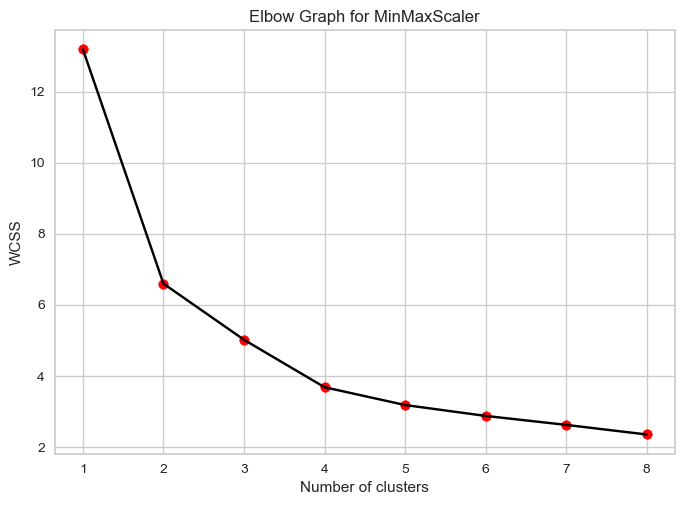

In [68]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,9),wcss,color="black")
plt.scatter(range(1,9),wcss,color="red")
plt.title("Elbow Graph for MinMaxScaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Elbow Plot for MinMaxScaler data


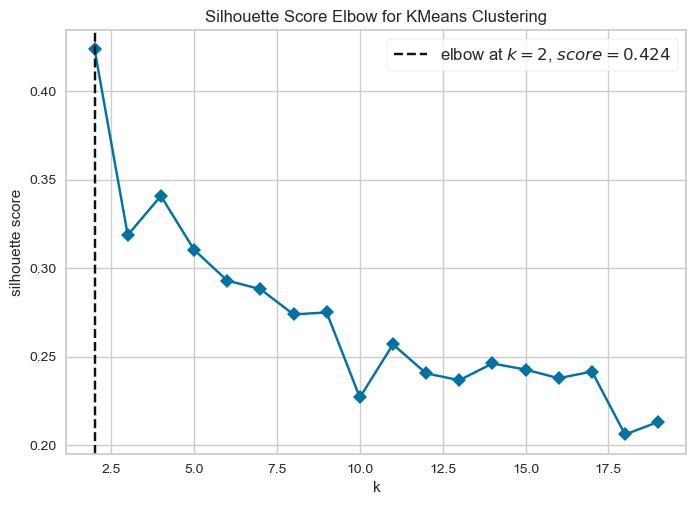

In [69]:
model=KMeans(random_state=10,max_iter=500,init="k-means++")

# Instantiate the KElbowVisualizer with the number of clusters and the metric

visualizer=KElbowVisualizer(model,k=(2,20),metric="silhouette",timings=False)

# Fit the data and visualize

print("Elbow Plot for MinMaxScaler data")
visualizer.fit(norm_crime)
visualizer.poof()
plt.show()

In [70]:
clust_list= [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(norm_crime)
    sil_score1=silhouette_score(norm_crime,cluster_labels1)
    print("For n_clusters=",n_clusters,"The average silhouette_scores is :",sil_score1)
    

For n_clusters= 2 The average silhouette_scores is : 0.42364457559625074
For n_clusters= 3 The average silhouette_scores is : 0.3187755079997931
For n_clusters= 4 The average silhouette_scores is : 0.3408903560074363
For n_clusters= 5 The average silhouette_scores is : 0.30627425257528484
For n_clusters= 6 The average silhouette_scores is : 0.2703558739205172
For n_clusters= 7 The average silhouette_scores is : 0.23711197479268134
For n_clusters= 8 The average silhouette_scores is : 0.24422345369104234
For n_clusters= 9 The average silhouette_scores is : 0.23181794623773658


In [71]:
# Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

# We have found good number of cluster = 2

#Model building using cluster numbers = 2

model_kmeans=KMeans(n_clusters=2,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(norm_crime)
y_predict_kmeans.shape

(50,)

In [72]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [73]:
model_kmeans.labels_


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [74]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [75]:
model_kmeans.inertia_


6.596893867946196

In [76]:
#Assign clusters to the data set

crime_df['Kmeans_Label'] = model_kmeans.labels_

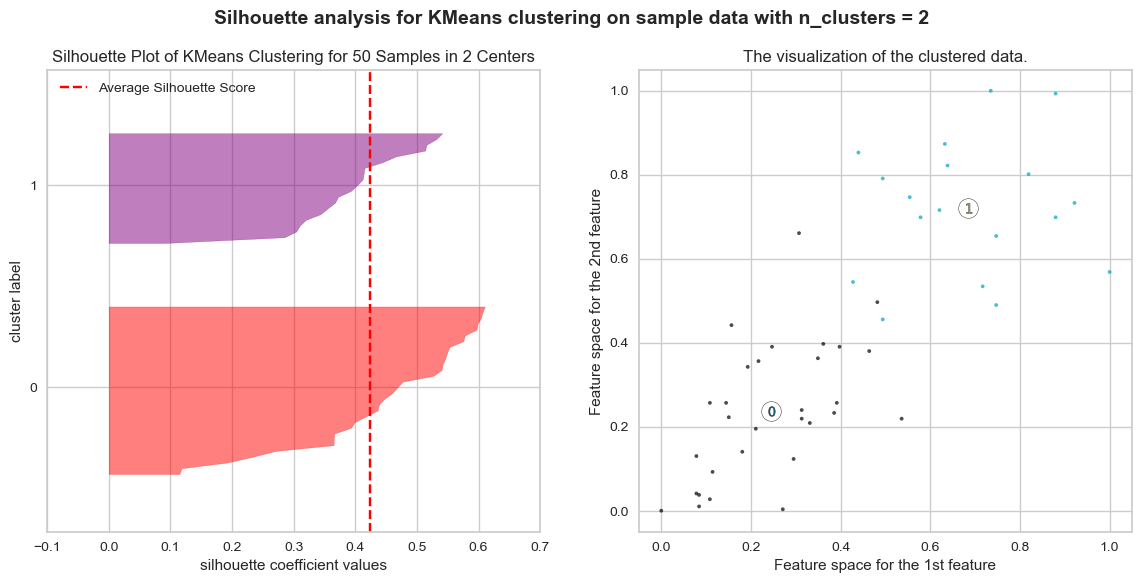

In [77]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1=SilhouetteVisualizer(model_kmeans,ax=ax1,colors=["red","purple","blue","yellow"])
sil_visualizer1.fit(norm_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_kmeans.labels_.astype(float)/3)
ax2.scatter(norm_crime[:,0],norm_crime[:,1],marker=".",s=30,lw=0,alpha=0.7,c=colors1,edgecolor="k")

# Labeling the clusters
centers1=model_kmeans.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers1[:,0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i,c in enumerate(centers1):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

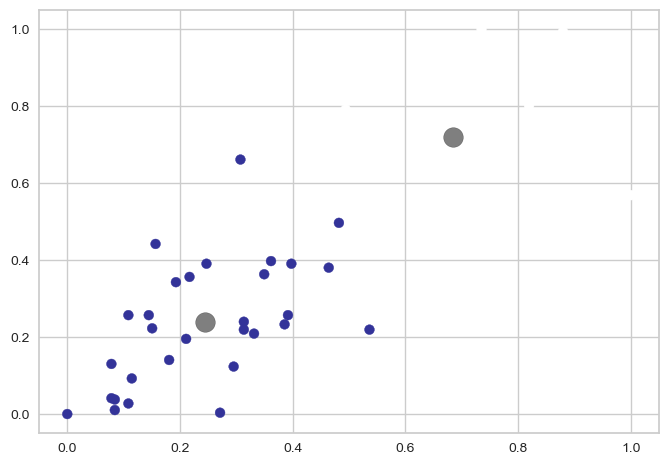

In [78]:
# Visualize the data we reduced to 2 sets.

plt.scatter(norm_crime[:,0],norm_crime[:,1],c=model_kmeans.labels_,s=50,cmap="terrain")
centers=model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5)
plt.show()

In [79]:
# Group data by Clusters (K=6)

crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


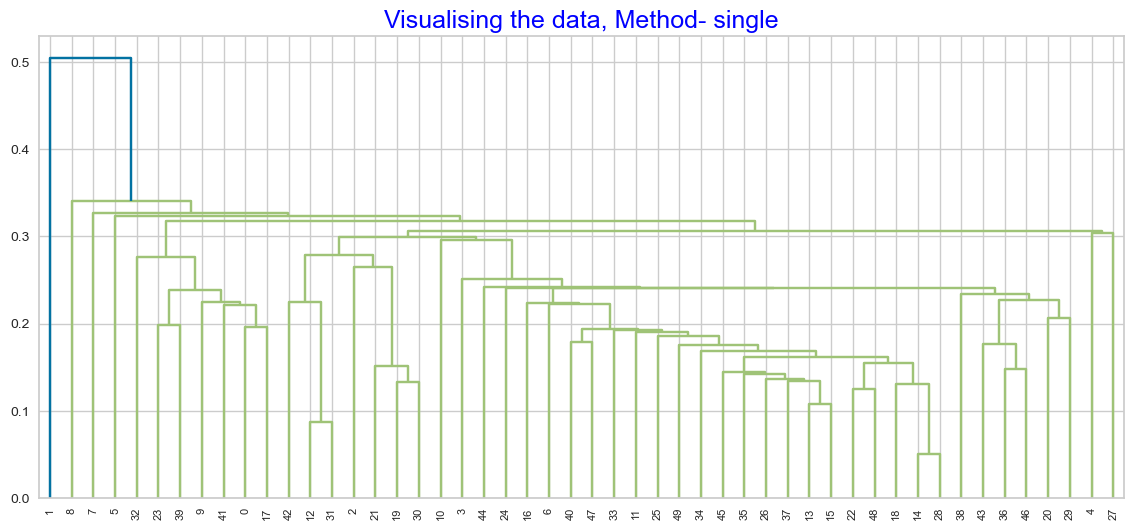

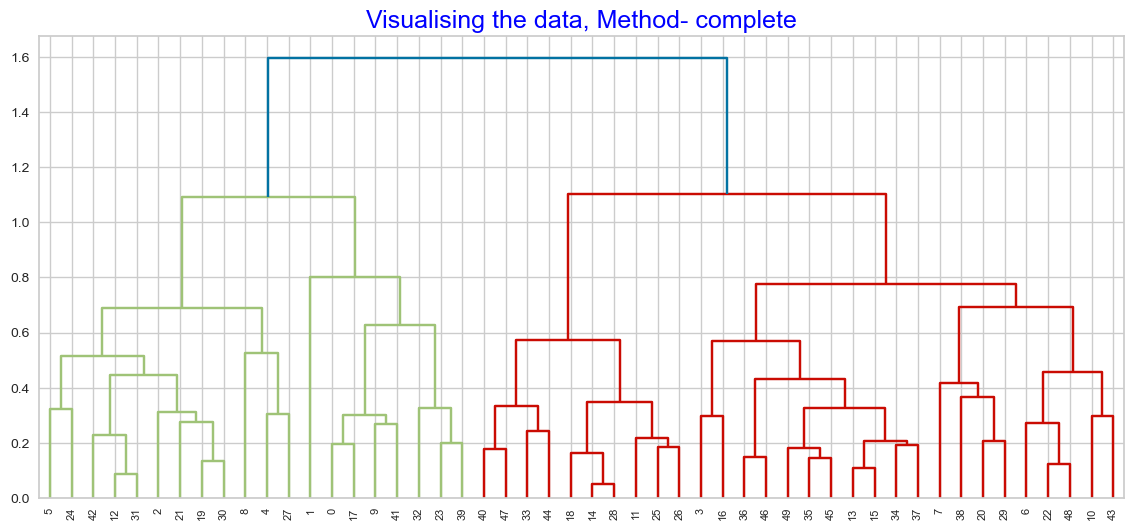

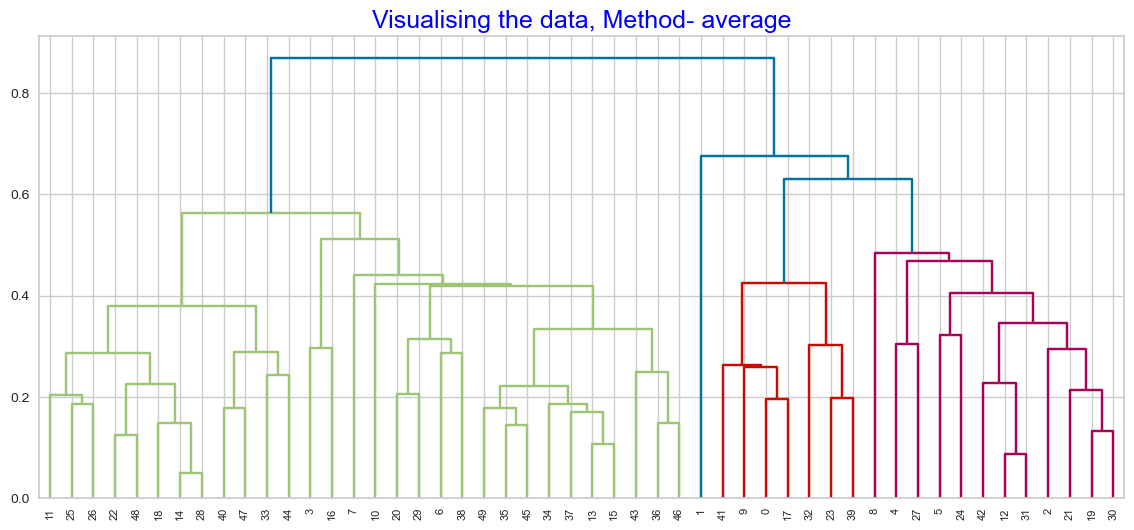

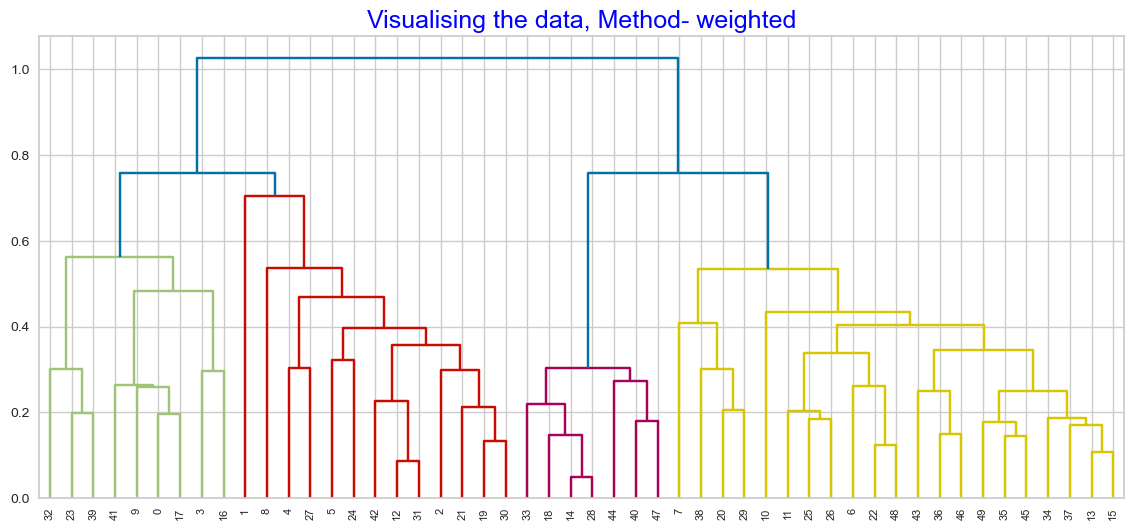

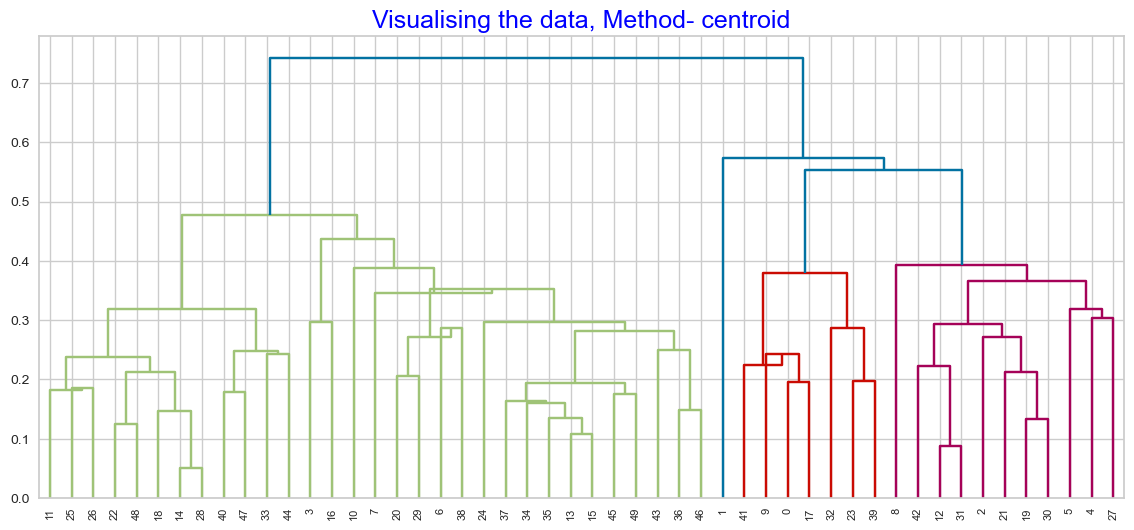

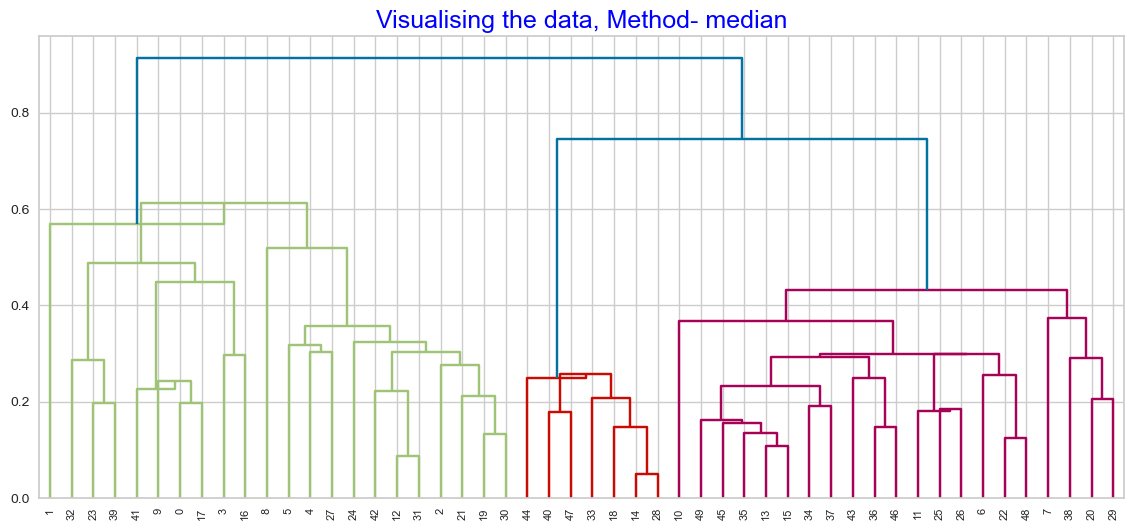

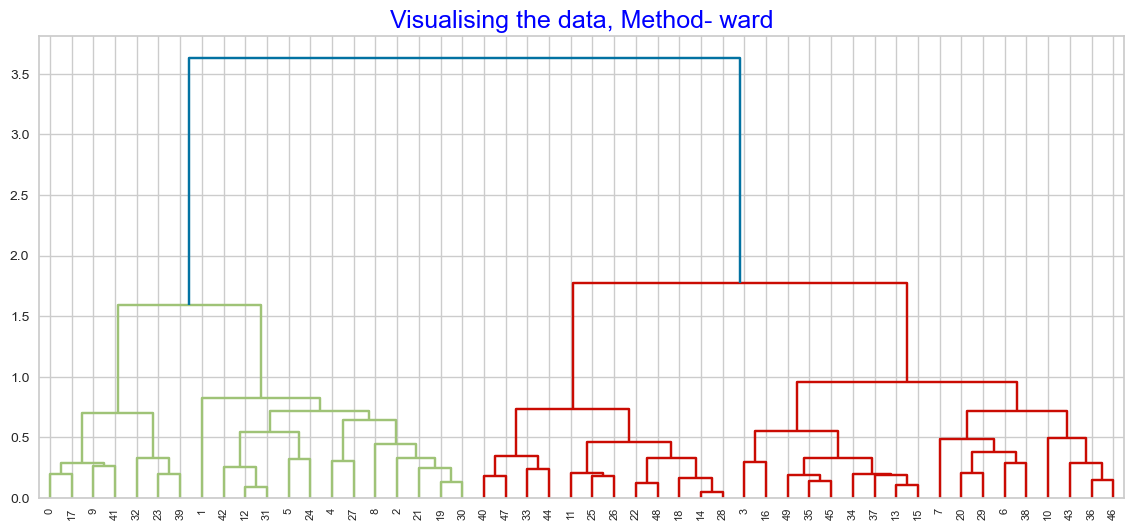

In [80]:
# Hierarchical Clustering Algorithm

# Dendogram on MinMaxScaler Applied on Dataset

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(14,6))
    dict={"fontsize":18,"fontweight":16,"color":"blue"}
    plt.title("Visualising the data, Method- {}".format(methods),fontdict=dict)
    Dendrogram1=sch.dendrogram(sch.linkage(norm_crime,method=methods,optimal_ordering=False))

In [81]:
n_clusters=[2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters,linkage=linkages)
        hie_labels1=hie_cluster1.fit_predict(norm_crime)
        silhouette_score1=silhouette_score(norm_crime,hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
        
    print()  

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958485

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.30607294424263076
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3699239114027

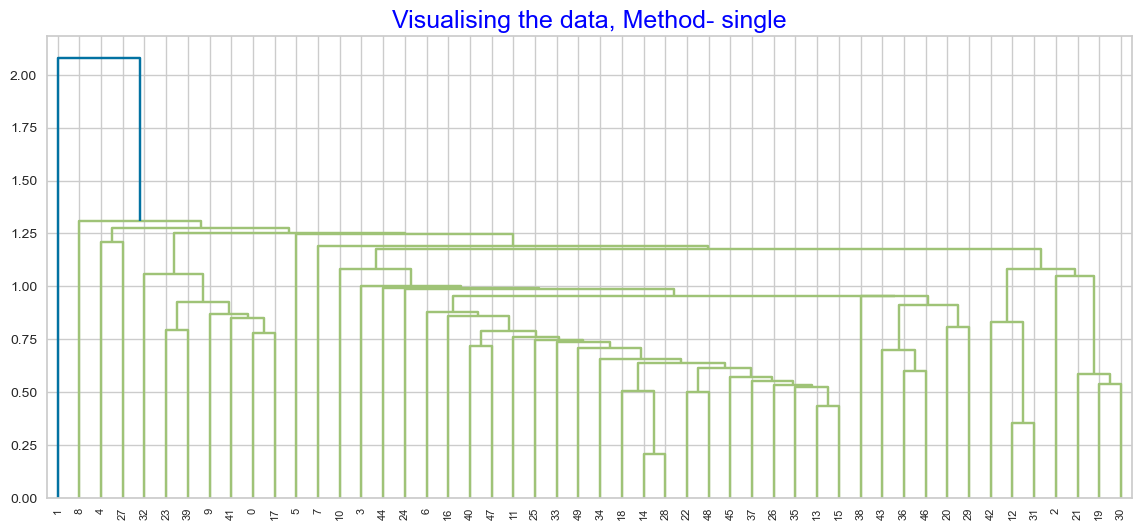

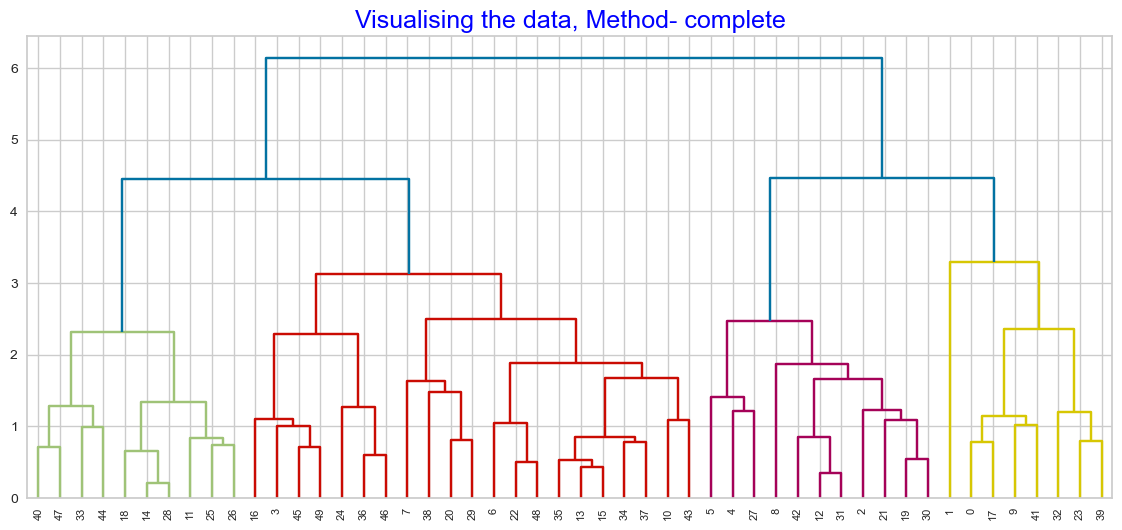

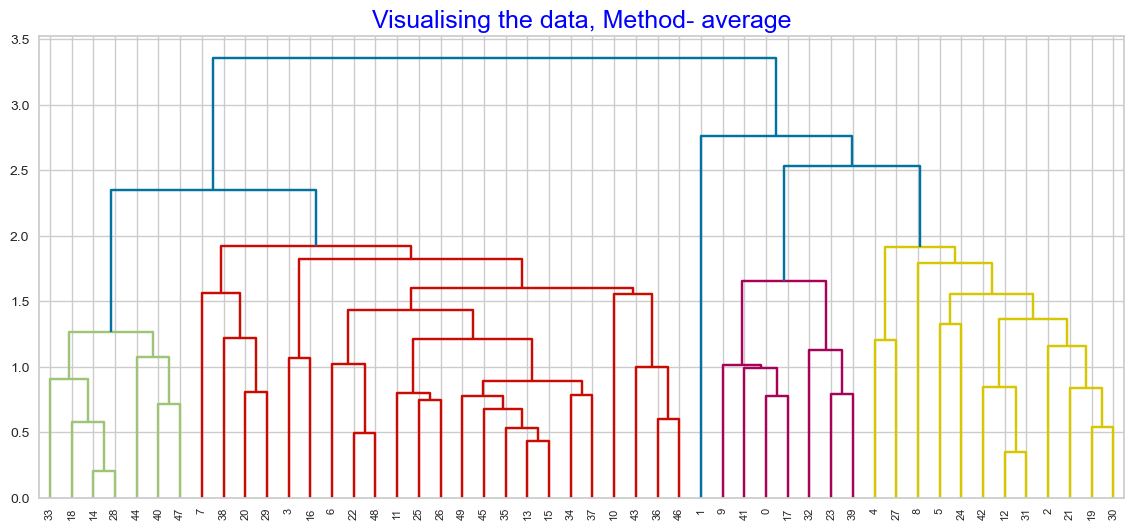

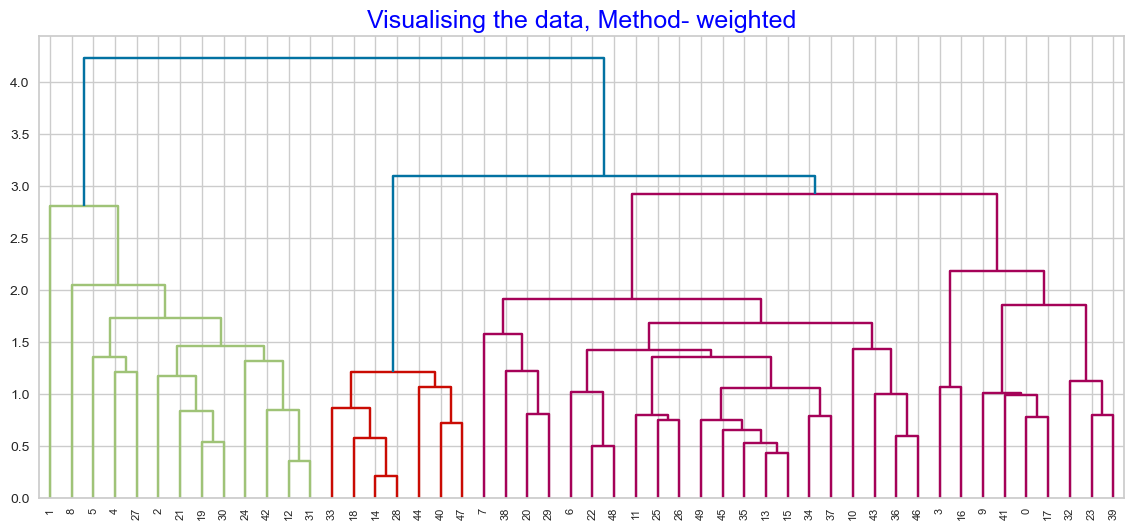

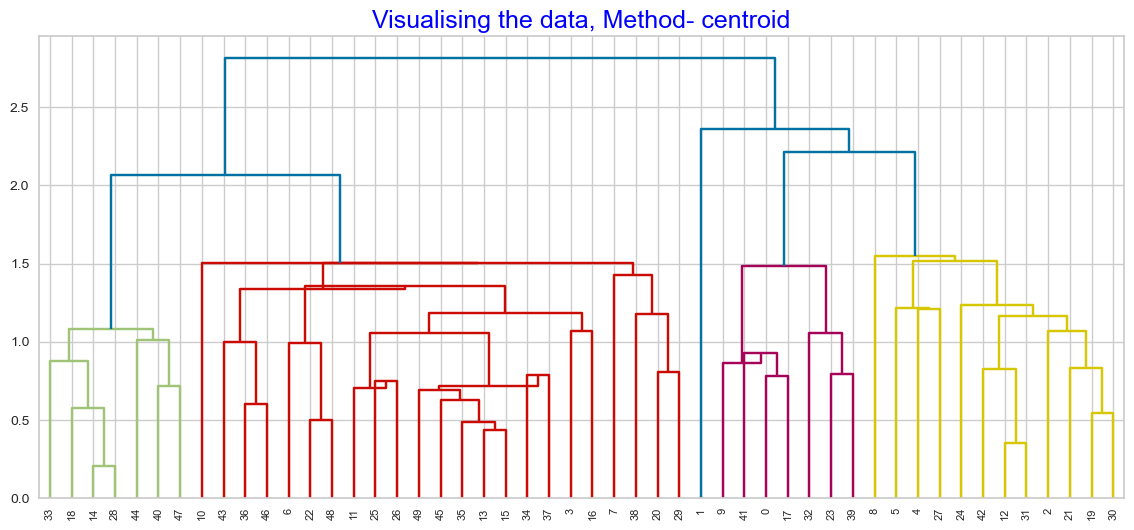

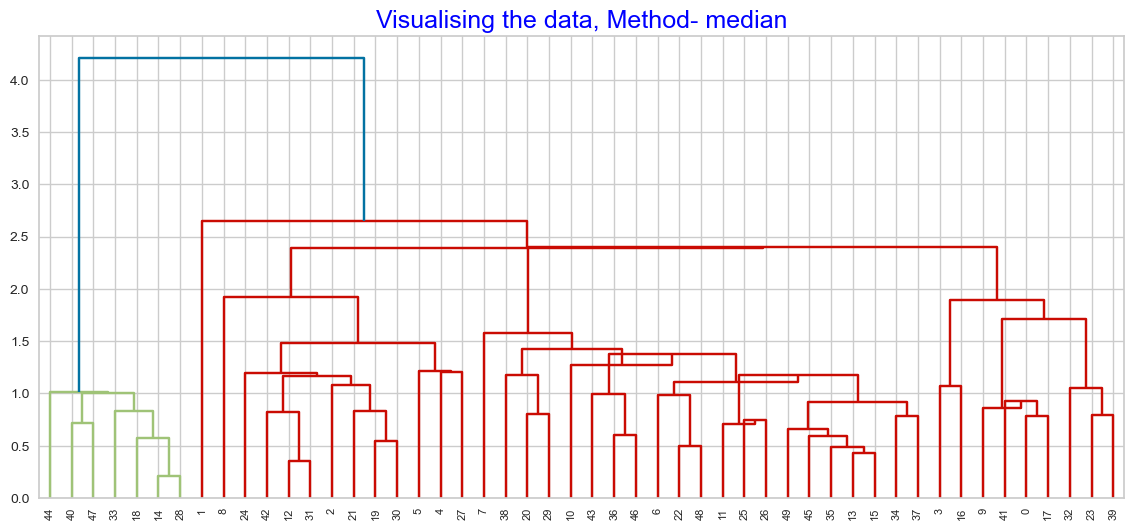

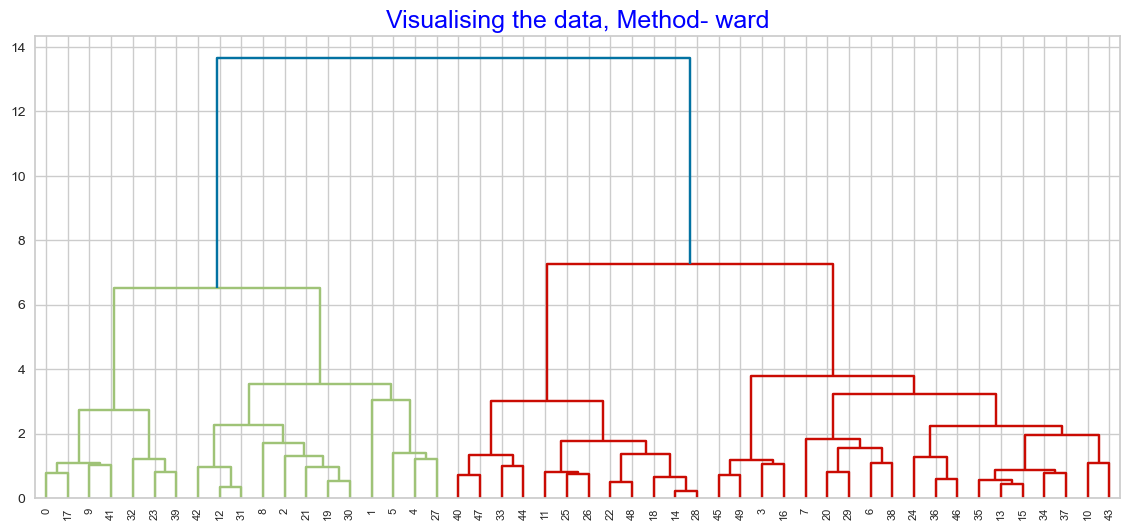

In [82]:
# Dendrogram on Standard Scaler Applied on Data
    
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(14,6))
    dict={"fontsize":18,"fontweight":16,"color": "blue"}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1=sch.dendrogram(sch.linkage(std_crime,method=methods,optimal_ordering=False))

In [83]:
n_clusters=[2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels2=hie_cluster2.fit_predict(std_crime)
        silhouette_score2=silhouette_score(std_crime,hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159798

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3159550742616455
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221


In [84]:
# Run Hierarchical Clustering.(Agglomerative Clustering)

agg_clustering=AgglomerativeClustering(n_clusters=2,linkage="ward")
y_pred_hie=agg_clustering.fit_predict(norm_crime)
print(y_pred_hie.shape)
y_pred_hie
                                       
                                       

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [86]:

# Clustering Score

(silhouette_score(norm_crime, agg_clustering.labels_)*100).round(3)

42.364

In [87]:
# Putting Cluster lables into original dataset And analysis of the same

# Concating Labels with main dataset copy

crime_df['Hierarchical_Labels'] = agg_clustering.labels_

In [88]:
crime_df.groupby('Hierarchical_Labels').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,Kmeans_Label
,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


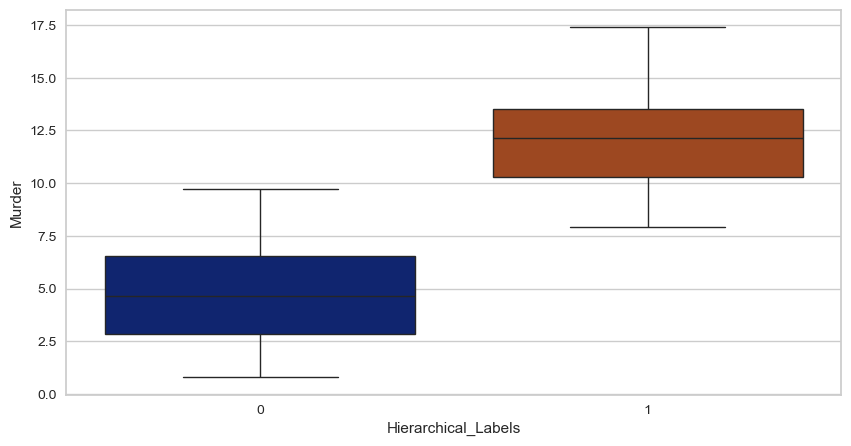

In [89]:

plt.figure(figsize=(10,5))
sns.boxplot(x="Hierarchical_Labels",y="Murder",data=crime_df,palette="dark")
plt.show()

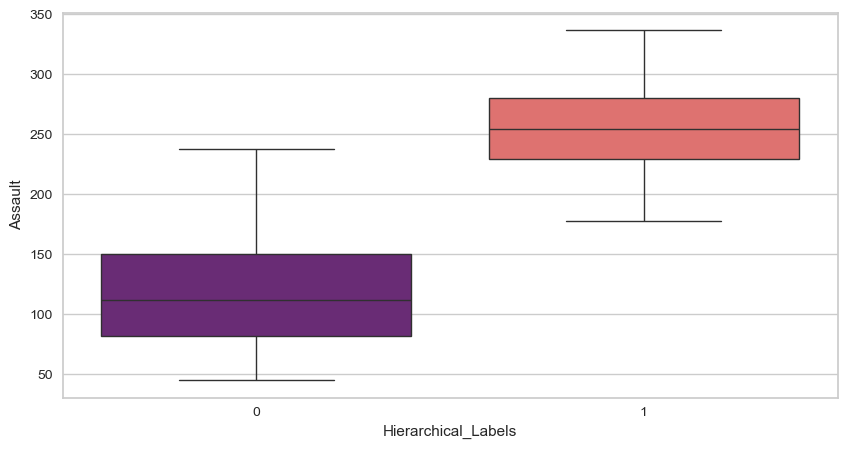

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Assault', data= crime_df,palette="magma")
plt.show()

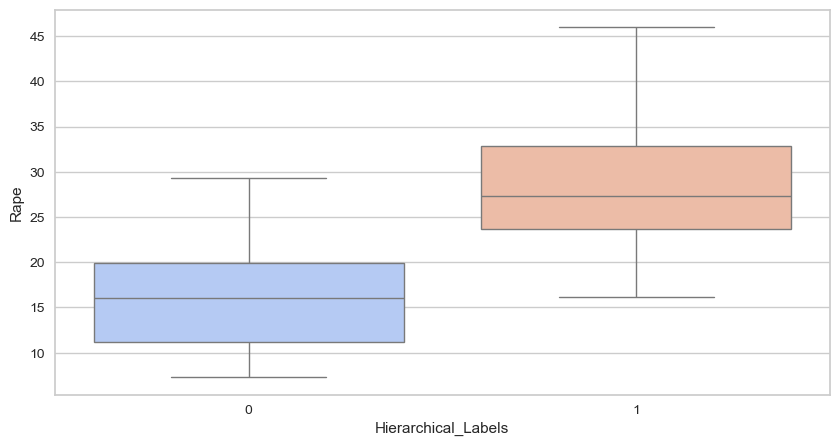

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Rape', data= crime_df,palette="coolwarm")
plt.show()

In [92]:
# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

# DBSCAN of Standard Scaled Data

from itertools import product

eps_values=np.arange(0.25,2,0.25)
min_samples=np.arange(1,3)
DBSCAN_params=list(product(eps_values,min_samples))


In [93]:
no_of_clusters=[]
sil_score=[]

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(std_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_crime,DBS_clustering.labels_))
    

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


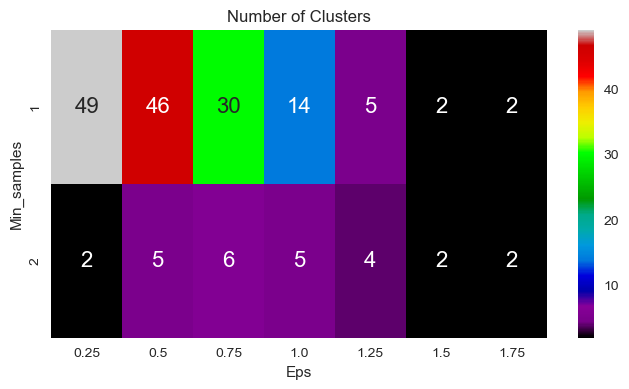

In [94]:
# Collecting number of generated clusters.

tmp=pd.DataFrame.from_records(DBSCAN_params,columns=["Eps","Min_samples"])
tmp["No_of_clusters"]=no_of_clusters
pivot_1=pd.pivot_table(tmp,values="No_of_clusters",index="Min_samples",columns="Eps")

fig,ax=plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16},cmap="nipy_spectral",ax=ax)
ax.set_title("Number of Clusters")
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

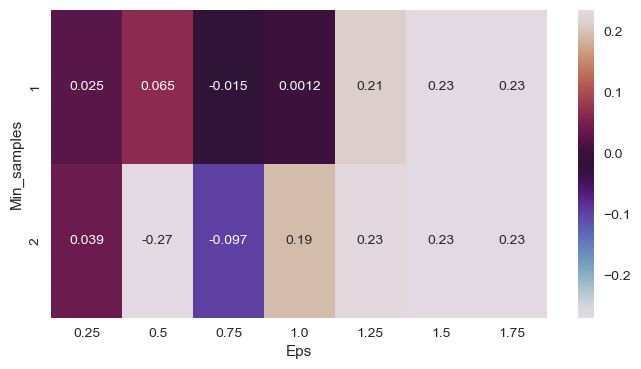

In [95]:
# As the heatplot above shows, the number of clusters vary from 49 to 2.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="twilight", ax=ax)
plt.show()

In [96]:
# Global maximum is 0.23 for eps=1.25 and min_samples=2

epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])    

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [97]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

dbscan=DBSCAN(eps=1.5,min_samples=1)
dbscan.fit(std_crime)

DBSCAN(eps=1.5, min_samples=1)

In [98]:
dbscan.labels_


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
# '1' are the noise points in our dataset and the rest are the clusters

# Concating Labels with main dataset copy

crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [100]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [101]:
# Silhouette Score for DBSCAN

print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, dbscan.labels_))


Silhouette Coefficient: 0.235


In [102]:
# DBSCAN on MinMax Scaled Data

from itertools import product

eps_values=np.arange(0.25,0.75,0.25)
min_samples=np.arange(1,3)
DBSCAN_params=list(product(eps_values,min_samples))

In [103]:
   
no_of_clusters=[]
sil_score=[]

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(norm_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_crime,DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


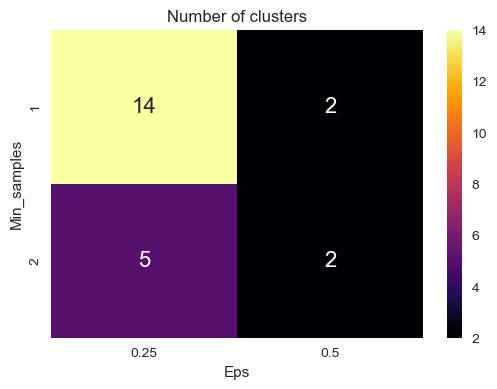

In [104]:
# Collecting number of generated clusters.

tmp=pd.DataFrame.from_records(DBSCAN_params,columns=["Eps","Min_samples"])
tmp["No_of_clusters"]=no_of_clusters
pivot_1=pd.pivot_table(tmp,values="No_of_clusters",index="Min_samples",columns="Eps")

fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16},cmap="inferno",ax=ax)
ax.set_title("Number of clusters")
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

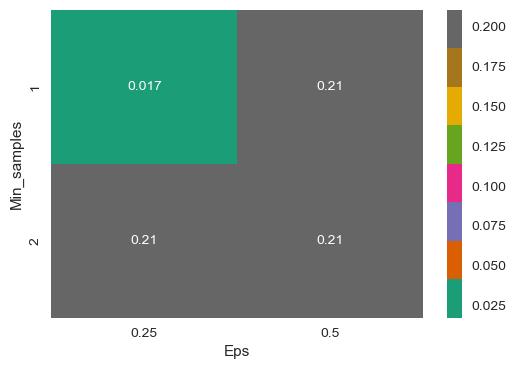

In [105]:
# As the heatplot above shows, the number of clusters vary from 14 to 2.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Dark2", ax=ax)
plt.show()

In [106]:
# Global maximum is 0.21 for eps=0.5 and min_samples=2

epsilon=[0.25,0.5]
min_Samples=[1,2]
max_value=[0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        
        db=DBSCAN(min_samples=min_samples[j],eps=epsilon[i]).fit(norm_crime)
        
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        labels=db.labels_
        
        # Number of clusters in labels, ignoring noise if present.
        n_clusters=len(set(labels))-(1 if -1 in labels else 0)
        n_noise_=list(labels).count(-1)
        
        silhouette_avg=silhouette_score(norm_crime,labels)
        if silhouette_avg>max_value[3]:
            max_value=(epsilon[i],min_samples[j],n_clusters_,silhouette_avg)
        sil_avg.append(silhouette_avg)
        
print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])        

epsilon= 0.5 
min_sample= 1 
number of clusters= 1 
average silhouette score= 0.2103


In [107]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

dbscan = DBSCAN(eps=0.5, min_samples=1) 
dbscan.fit(norm_crime)

DBSCAN(min_samples=1)

In [108]:
dbscan.labels_


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
# -1 are the noise points in our dataset and the rest are the clusters

# Concating Labels with main dataset copy

crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [110]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [111]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1=pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==0].mean(),columns=["Cluster1_Avg"])
cluster2=pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==1].mean(),columns=["Cluster2_Avg"])
avg_crime=pd.concat([cluster1,cluster2],axis=1)
avg_crime

,Cluster1_Avg,Cluster2_Avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_Label,0.387755,1.0
Hierarchical_Labels,0.387755,1.0
DBSCAN_Labels,0.000000,1.0


# Observations:
# The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
# The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.